In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, f1_score, r2_score, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
off_df= pd.read_excel("Office Supply Campaign ResultS 7-23-19(Dataset_officeSupplyCapstone).xlsx")
off_df

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,...,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,86734.0,238.704762,1.468034e+05,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,...,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,4.399842e+05,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,9.704657e+05,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,6-10,English
3,116390.0,0.000000,2.301936e+05,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,...,N,N,N,N,N,N,N,Y,1-5,English
4,127914.0,1370.166667,2.740333e+04,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),...,N,N,N,N,N,Y,N,N,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16168,167014041.0,0.000000,2.558801e+06,1994-06-01,7.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,N,,NaN
16169,167077817.0,0.000000,2.355030e+06,1995-01-01,6.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,N,,NaN
16170,167089540.0,0.000000,5.845700e+05,1996-02-01,2.0,0.0,1.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,N,,NaN
16171,167235933.0,0.000000,1.949425e+06,1998-03-15,4.0,0.0,0.0,0.0,NOTICE,PHONE,...,N,N,N,N,N,N,N,N,,NaN


In [8]:
# we set our max columns to none so we can view every column in the dataset.Here to 50
pd.set_option('display.max_columns', 50)

# Data exploration/visualization

In [10]:
off_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Customer Number                    16172 non-null  float64       
 1   Campaign Period Sales              16172 non-null  float64       
 2   Historical Sales Volume            16172 non-null  float64       
 3   Date of First Purchase             16172 non-null  datetime64[ns]
 4   Number of Prior Year Transactions  16172 non-null  float64       
 5   Do Not Direct Mail Solicit         16172 non-null  float64       
 6   Do Not Email                       16172 non-null  float64       
 7   Do Not Telemarket                  16172 non-null  float64       
 8   Repurchase Method                  16172 non-null  object        
 9   Last Transaction Channel           15730 non-null  object        
 10  Desk                              

In [11]:
off_df.isnull().sum()

Customer Number                         1
Campaign Period Sales                   1
Historical Sales Volume                 1
Date of First Purchase                  1
Number of Prior Year Transactions       1
Do Not Direct Mail Solicit              1
Do Not Email                            1
Do Not Telemarket                       1
Repurchase Method                       1
Last Transaction Channel              443
Desk                                    0
Executive Chair                         2
Standard Chair                          2
Monitor                                 2
Printer                                 2
Computer                                1
Insurance                               3
Toner                                   3
Office Supplies                         1
Number of Employees                     3
Language                             4472
dtype: int64

In [13]:
off_df.tail(10)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
16163,166873914.0,0.000000,3.046590e+06,1991-03-15,9.0,0.0,1.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,N,N,N,,NaN
16164,166893156.0,0.000000,1.971091e+06,1988-05-15,4.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,N,N,N,,NaN
16165,166911510.0,2566.166667,1.108584e+06,1994-06-01,28.0,0.0,0.0,0.0,NOTICE,WEB,N,N,N,N,N,N,N,N,N,,NaN
16166,166955549.0,0.000000,4.959500e+04,2015-06-18,2.0,0.0,0.0,0.0,NOTICE,WEB,N,N,N,N,N,N,N,N,N,,NaN
16167,166988514.0,0.000000,7.012954e+05,1995-12-15,3.0,0.0,1.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,N,,NaN
16168,167014041.0,0.000000,2.558801e+06,1994-06-01,7.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,,NaN
16169,167077817.0,0.000000,2.355030e+06,1995-01-01,6.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,,NaN
16170,167089540.0,0.000000,5.845700e+05,1996-02-01,2.0,0.0,1.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,,NaN
16171,167235933.0,0.000000,1.949425e+06,1998-03-15,4.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,N,,NaN
16172,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Identify row/s  nan value for target variable- should be dropped

In [7]:
# Target variable should not be nan
off_df[off_df["Campaign Period Sales"].isnull()]
off_df = off_df[off_df['Campaign Period Sales'].notnull()].reset_index(drop=True) 
                   # Drop=True to avoid the old index, if False-old index becomes column

## Visualize pairplot

In [8]:
# import seaborn as sns
# sns.pairplot(off_df);

In [14]:
# target corr with numeric columns 
off_df.corr()["Campaign Period Sales"]

Customer Number                      0.104428
Campaign Period Sales                1.000000
Historical Sales Volume              0.144124
Number of Prior Year Transactions    0.099268
Do Not Direct Mail Solicit           0.052657
Do Not Email                         0.026582
Do Not Telemarket                    0.050393
Name: Campaign Period Sales, dtype: float64

In [10]:
## seems 'Campaign Period Sales' has no relation with the bool features
#off_df.loc[1442,:]

## Outliers
 drop outliers from 'Number of Prior Year Transaction' and 'Historical Sales Volume'

In [15]:
off_df[off_df['Number of Prior Year Transactions']==313.0]

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
3331,7585835.0,2629.666667,163039.333333,1979-02-01,313.0,1.0,0.0,1.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,,NaN


In [16]:
off_df[off_df['Historical Sales Volume']==34412125.800000004]

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
3530,8005300.0,0.0,34412125.8,1987-07-01,36.0,0.0,0.0,0.0,AUTO RENEW,WEB,N,N,N,N,Y,N,N,N,N,,NaN


In [17]:
off_df = off_df.drop([3331,3530],axis = 0)

---

## Zeroed Sales: 
Negative sales in both campaign period and historical should be avoided/conert to zero

In [18]:
def convert_zeros(ser):
    ser = ser.apply(lambda x: x if x>0 else 0)
    return ser
off_df["Campaign Period Sales"] = convert_zeros(off_df["Campaign Period Sales"])
off_df["Historical Sales Volume"] = convert_zeros(off_df["Historical Sales Volume"])   

## Check for 'Customer Number' duplication

In [19]:
#off_df['Customer Number'].value_counts().count()  # if not equal to len(off_df)- duplicate
#    or
off_df['Customer Number'].duplicated().sum()  # no duplicate Customer Id

0

# 'Number of Employees': avoid blanks
Fill the blanks by np.nan

In [20]:

def blank_to_na(df): 
    if 'Number of Employees' in df.columns:
        df['Number of Employees'] = df['Number of Employees'].replace(' ',np.nan)
    return df
blank_to_na(off_df)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,86734.0,238.704762,1.468034e+05,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,4.399842e+05,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,9.704657e+05,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English
3,116390.0,0.000000,2.301936e+05,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English
4,127914.0,1370.166667,2.740333e+04,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16168,167014041.0,0.000000,2.558801e+06,1994-06-01,7.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,NaN,NaN
16169,167077817.0,0.000000,2.355030e+06,1995-01-01,6.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,NaN,NaN
16170,167089540.0,0.000000,5.845700e+05,1996-02-01,2.0,0.0,1.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,NaN,NaN
16171,167235933.0,0.000000,1.949425e+06,1998-03-15,4.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,N,NaN,NaN


In [21]:
def numeric_employees(df):
    lst = df['Number of Employees'].tolist()
    lst1 = []
    lst2 = []
    for ls in lst:
        if type(ls)==str:
            temp = ls.split('-')
            if len(temp)>1:
                lst1.append((int(temp[0])+int(temp[1]))/2)
                lst2.append((int(temp[0])+int(temp[1]))/2)
            else:
                temp2 = ls.split('+')
                lst1.append(int(temp2[0]))
                lst2.append(int(temp2[0]))
        else:
            lst1.append(ls)
    mean = np.mean(lst2)
    df['Number of Employees'] = lst1
    df['Number of Employees'] = df['Number of Employees'].fillna(mean)
    return df

off_df = numeric_employees(off_df)

In [22]:
off_df.isnull().sum()

Customer Number                         1
Campaign Period Sales                   0
Historical Sales Volume                 0
Date of First Purchase                  1
Number of Prior Year Transactions       1
Do Not Direct Mail Solicit              1
Do Not Email                            1
Do Not Telemarket                       1
Repurchase Method                       1
Last Transaction Channel              443
Desk                                    0
Executive Chair                         2
Standard Chair                          2
Monitor                                 2
Printer                                 2
Computer                                1
Insurance                               3
Toner                                   3
Office Supplies                         1
Number of Employees                     0
Language                             4470
dtype: int64

## 'Date of First Purchase' is converted to 'Number of months'

In [23]:
import datetime
def to_months(df):
        today = datetime.date.today()
        today64 = np.datetime64(today)
        diff_time = today64 - df["Date of First Purchase"]
        df["months_since_first_purchase"] = diff_time/np.timedelta64(1,'M')
        return df.drop('Date of First Purchase',axis = 1)
off_df = to_months(off_df)

In [24]:
off_df.head(1)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,months_since_first_purchase
0,86734.0,238.704762,146803.428571,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,8.0,English,653.31937


# Consolidate the Cat_cols:
combine those with small value counts: 'Language', 'Last Transaction Channel'

In [25]:
off_df['Language'].value_counts()
off_df['Last Transaction Channel'].value_counts()
#combine: Pashto, Thai, Korean,French, and Vietnamese

MAIL              7768
AUTO RENEW        3141
WEB               2647
PHONE             1096
BRANCH (POS)       633
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: Last Transaction Channel, dtype: int64

In [26]:
def consolidate_lan(df):
    other_l = ['Vietnamese','French','Korean','Pashto','Thai']
    other_last = ['BRANCH (POS)', 'BRANCH (PHONE)','BILLING', 'IT']
    cons_last = lambda x: x if x not in other_last else 'Other'
    cons_lang = lambda x: x if x not in other_l else 'Other'
    df['Language'] = df['Language'].apply(cons_lang)
    df['Last Transaction Channel'] = df['Last Transaction Channel'].apply(cons_last)
    return df
consolidate_lan(off_df).head(2)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,months_since_first_purchase
0,86734.0,238.704762,146803.428571,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,8.0,English,653.319370
1,97098.0,281.680000,439984.160000,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,30.5,English,500.872708


## Parse (clean) data
1. Partition data into training and testing sets FIRST!
2. With Training data:

    **Prepare target variables**:
    - change negative values in `Campaign Sales` and `Historical Sales` to zero
    - create classification target variable
    
   **Prepare features**:
    - create `since_first_purchase` column
    - separate categorical, numeric, and date columns
    
       **Categorical Data**:
        - impute missing values
        - create dummy variables for categorical columns (Repurchase Method)
        - convert Product columns to dummies
       
      **Numeric Data**:
        - imput missing values
        - standardize values
    
 - combine numeric and categorical features

# Split the data set into train and test

In [27]:
from sklearn.model_selection import train_test_split
# differentiate target variable
X = off_df.drop("Campaign Period Sales",axis = 1)
y = off_df["Campaign Period Sales"]

# the split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)


In [28]:
# train samples = 12936, test samples = 3234
X_train.shape, X_test.shape

((12936, 20), (3235, 20))

# Missingno

#### Imputation Strategies
1. Deductive Imputation: use logical relationships to fill in value **VALID**
2. Mean/Median/Mode: use measure central tendency to fill value **INVALID**
3. Regression Imputation: replace missing based on predicted value from regression line **INVALID**
    - PRO: Easy to understand
    - CON: Distorts distribution and underestimates variance
4. Stochastic Regression Imputation:
    - replace missing with predicted value from regression line plus random draw from normal distribution `N(0, s)`, where `s` is estimataed from model residuals **INVALID**
    - PRO: Easy to understand and better than just regression
    - CON: Still under estimate variance because selecting single point
5. Multiply Stochastic Regression Imputation: pull multiple values from distribution. Replace missing with predicted value from line with random error.
    - PRO: Better than number 4
    - CON: All `Beta` coefficients are constant, so still not credible
6. Proper Multiply Stochastic Regression Imputation: uses Bayesian imputation. Called Multiple Imputation by Chained Equations [(MICE)](https://stats.stackexchange.com/questions/421545/multiple-imputation-by-chained-equations-mice-explained)



## Note: 
* focus on 1. and 6.

## Determine why data are missing

In [45]:
##!pip install missingno
import missingno as msn

In [26]:
#X_train.isnull().sum()

# Group the columns:

In [32]:

do_not_cols = ["Do Not Direct Mail Solicit","Do Not Email","Do Not Telemarket"]
prod_cols = ["Desk","Computer","Office Supplies","Toner","Insurance","Executive Chair","Standard Chair","Monitor","Printer"]

ohe_cat_cols =["Last Transaction Channel","Repurchase Method","Language"]

num_cols = ['Historical Sales Volume','Number of Prior Year Transactions',"Number of Employees",'months_since_first_purchase']

other_cols = ['Customer Number','Do Not Direct Mail Solicit','Do Not Email', 'Do Not Telemarket']


In [33]:
# train 
num_df_train = X_train[num_cols] 
cat_df_train = X_train[ohe_cat_cols]
bool_df_train = X_train[prod_cols]
do_df_train = X_train[do_not_cols]


# test
num_df_test = X_test[num_cols] 
cat_df_test = X_test[ohe_cat_cols]
bool_df_test = X_test[prod_cols]
do_df_test = X_test[do_not_cols]

## Missing percentage in each category
#### Train set

In [34]:
# numerical cols
num_df_train.isnull().sum()/num_df_train.shape[0]

Historical Sales Volume              0.000000
Number of Prior Year Transactions    0.000077
Number of Employees                  0.000000
months_since_first_purchase          0.000077
dtype: float64

In [35]:
# categorical cols
cat_df_train.isnull().sum()/cat_df_train.shape[0]

Last Transaction Channel    0.028061
Repurchase Method           0.000077
Language                    0.275897
dtype: float64

In [36]:
# boolean/product cols
bool_df_train.isnull().sum()/bool_df_train.shape[0]

Desk               0.000000
Computer           0.000077
Office Supplies    0.000077
Toner              0.000232
Insurance          0.000232
Executive Chair    0.000155
Standard Chair     0.000155
Monitor            0.000155
Printer            0.000155
dtype: float64

### Test set

In [37]:
# numerical cols
num_df_test.isnull().sum()/num_df_test.shape[0]

Historical Sales Volume              0.0
Number of Prior Year Transactions    0.0
Number of Employees                  0.0
months_since_first_purchase          0.0
dtype: float64

In [33]:
# categorical cols
cat_df_test.isnull().sum()/cat_df_test.shape[0]

Last Transaction Channel    0.021954
Repurchase Method           0.000000
Language                    0.280458
dtype: float64

In [38]:
# boolean/product cols
bool_df_test.isnull().sum()/bool_df_test.shape[0]

Desk               0.0
Computer           0.0
Office Supplies    0.0
Toner              0.0
Insurance          0.0
Executive Chair    0.0
Standard Chair     0.0
Monitor            0.0
Printer            0.0
dtype: float64

In [39]:
# NEW!
# find list of categories within each categorical column
list_of_cats = []
for col in cat_df_train.columns:
    uniq_values = cat_df_train[col].unique().tolist()
    try:
        nan_idx = uniq_values.index(np.nan) # index of nan values
        uniq_values.pop(nan_idx)   # dropping nan by index of it
        list_of_cats.append(uniq_values) 
    except ValueError as ve:
        list_of_cats.append(uniq_values)
list_of_cats

[['MAIL', 'WEB', 'AUTO RENEW', 'PHONE', 'Other'],
 ['NOTICE', 'AUTO RENEW'],
 ['English',
  'Polish',
  'Spanish',
  'Chinese',
  'Hindi',
  'Japanese',
  'Portuguese',
  'Italian',
  'Russian',
  'Other',
  'Hebrew',
  'German',
  'Arabic',
  'Greek']]

In [40]:
# NEW!
# find list of categories within each categorical column
list_of_catsTE = []
for col in cat_df_test.columns:
    uniq_values = cat_df_test[col].unique().tolist()
    try:
        nan_idx = uniq_values.index(np.nan)
        uniq_values.pop(nan_idx)
        list_of_catsTE.append(uniq_values)
    except ValueError as ve:
        list_of_catsTE.append(uniq_values)
list_of_catsTE

[['PHONE', 'AUTO RENEW', 'WEB', 'Other', 'MAIL'],
 ['AUTO RENEW', 'NOTICE', 'PAYMENT PLAN'],
 ['English',
  'Chinese',
  'Spanish',
  'Portuguese',
  'Greek',
  'Hebrew',
  'Hindi',
  'Arabic',
  'Italian',
  'German',
  'Japanese',
  'Other',
  'Polish',
  'Russian']]

# Display missing data in cat_df_train

The __msn.matrix__ nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

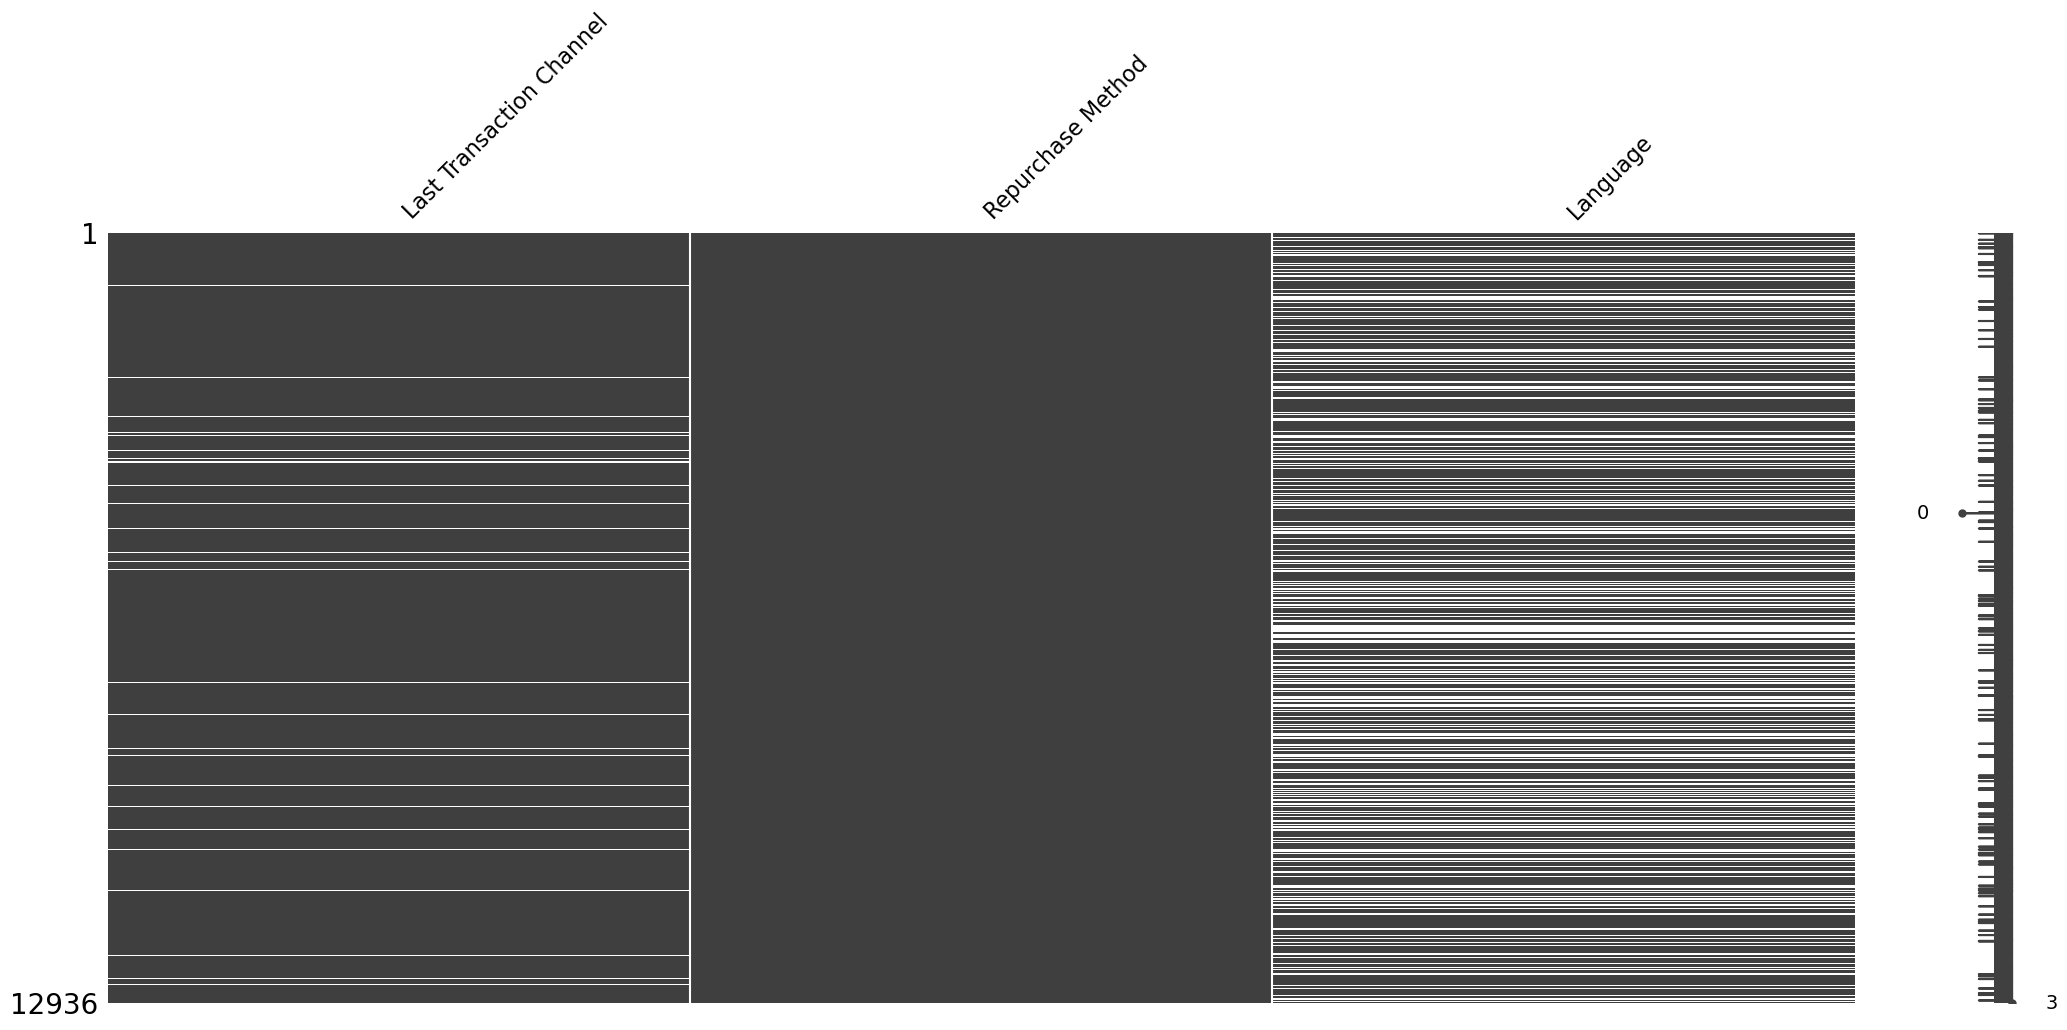

In [46]:
msn.matrix(cat_df_train);

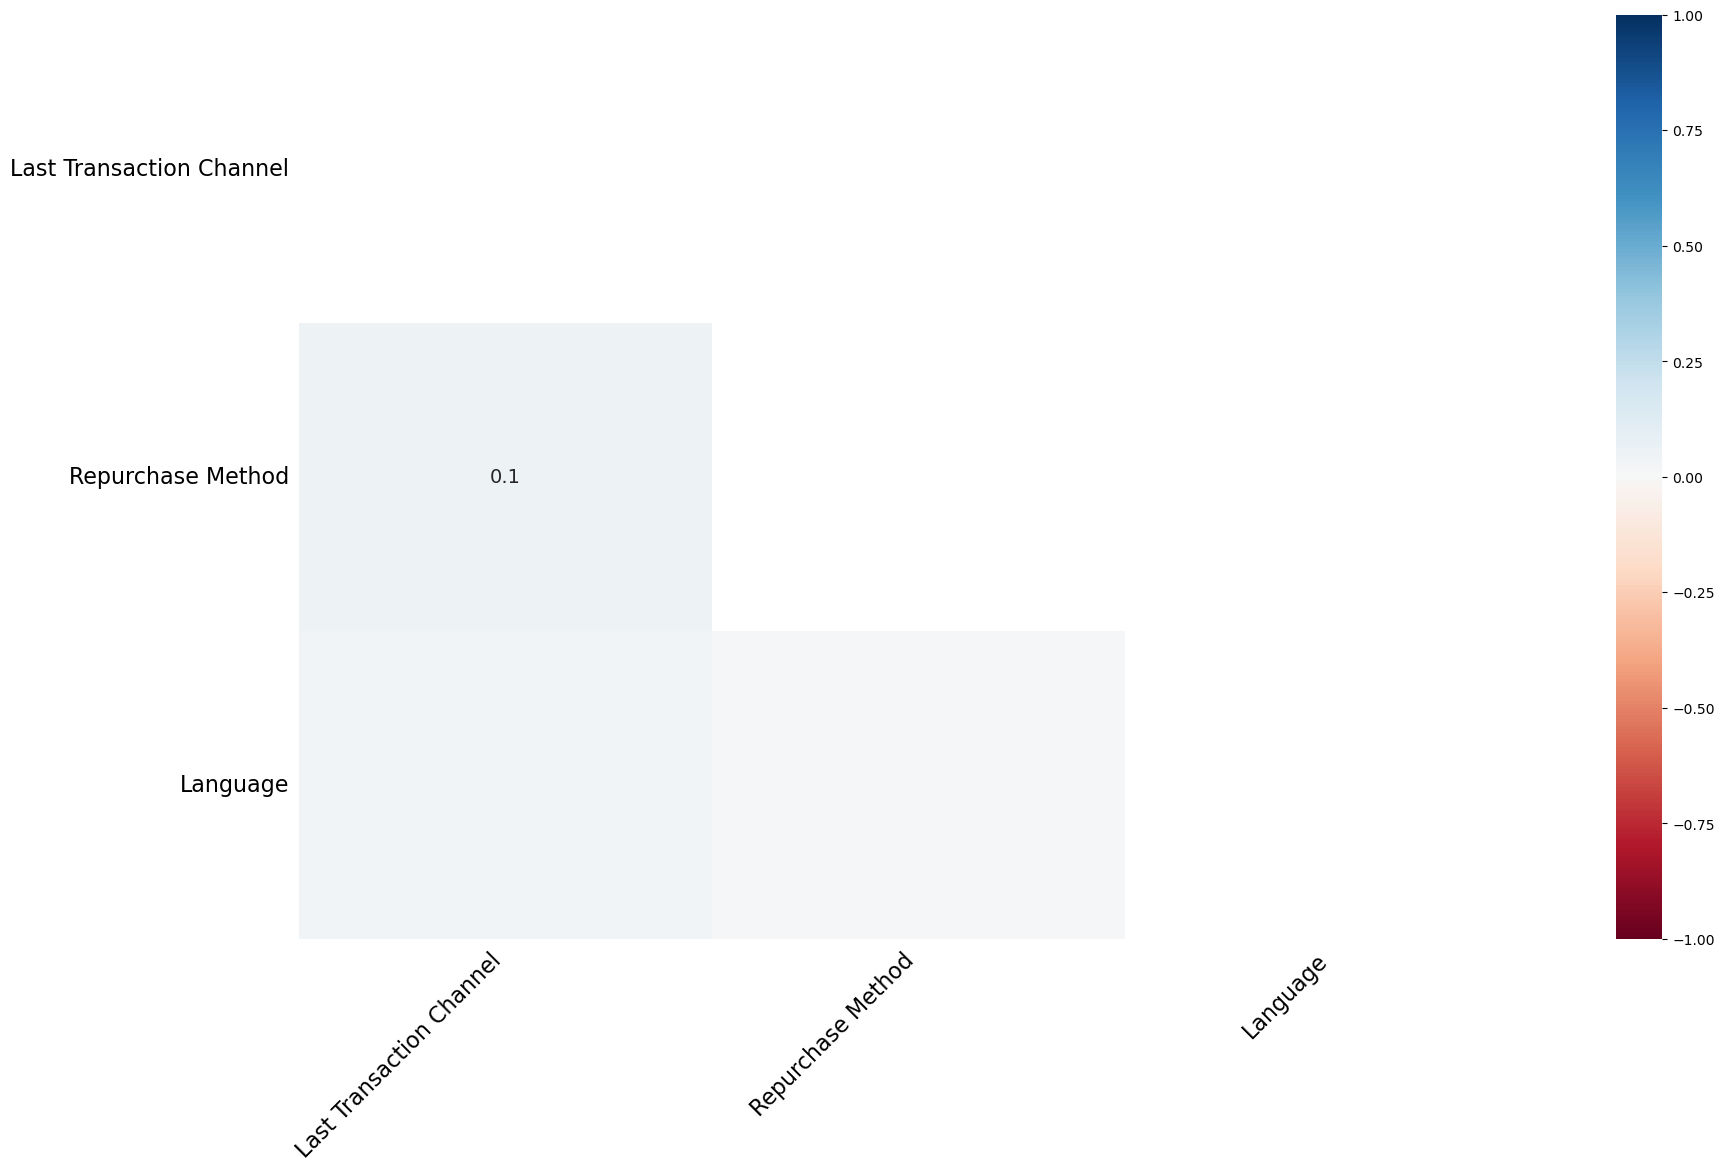

In [47]:
msn.heatmap(cat_df_train);#Variables that are always full or always empty have no 
#  meaningful correlation, and so are silently removed from the visualization

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).
### That is:
    * -1 --> if one variable appears the other definitely does not
    * 0 ---> variables appearing or not appearing have no effect on one another
    * 1 ---> if one variable appears the other definitely also does

In [39]:
## Look 'Langauge' vs 'Number of Employee' missings are correlated

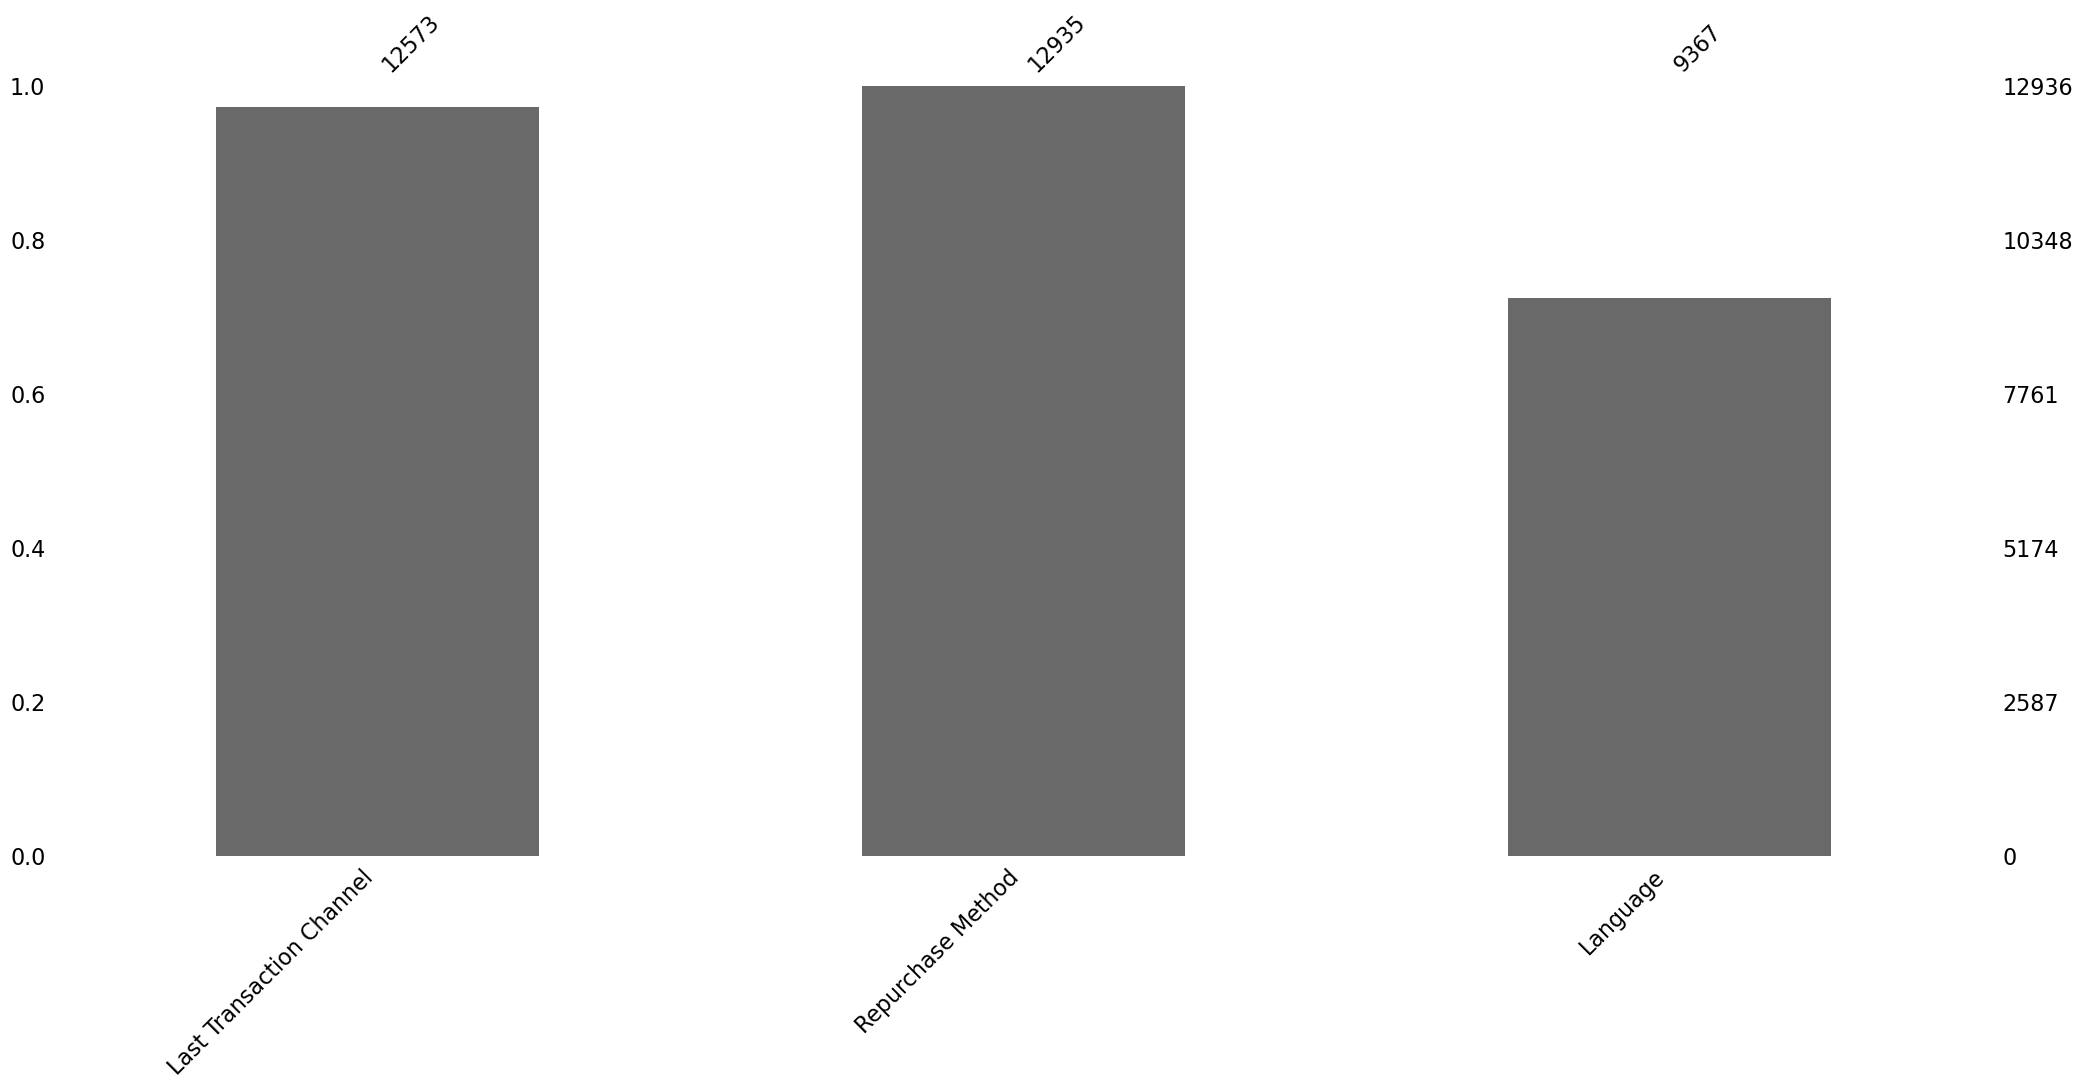

In [48]:
# nullity by column
msn.bar(cat_df_train); # the number on the top of the bar- filled data

## dendrogram
The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

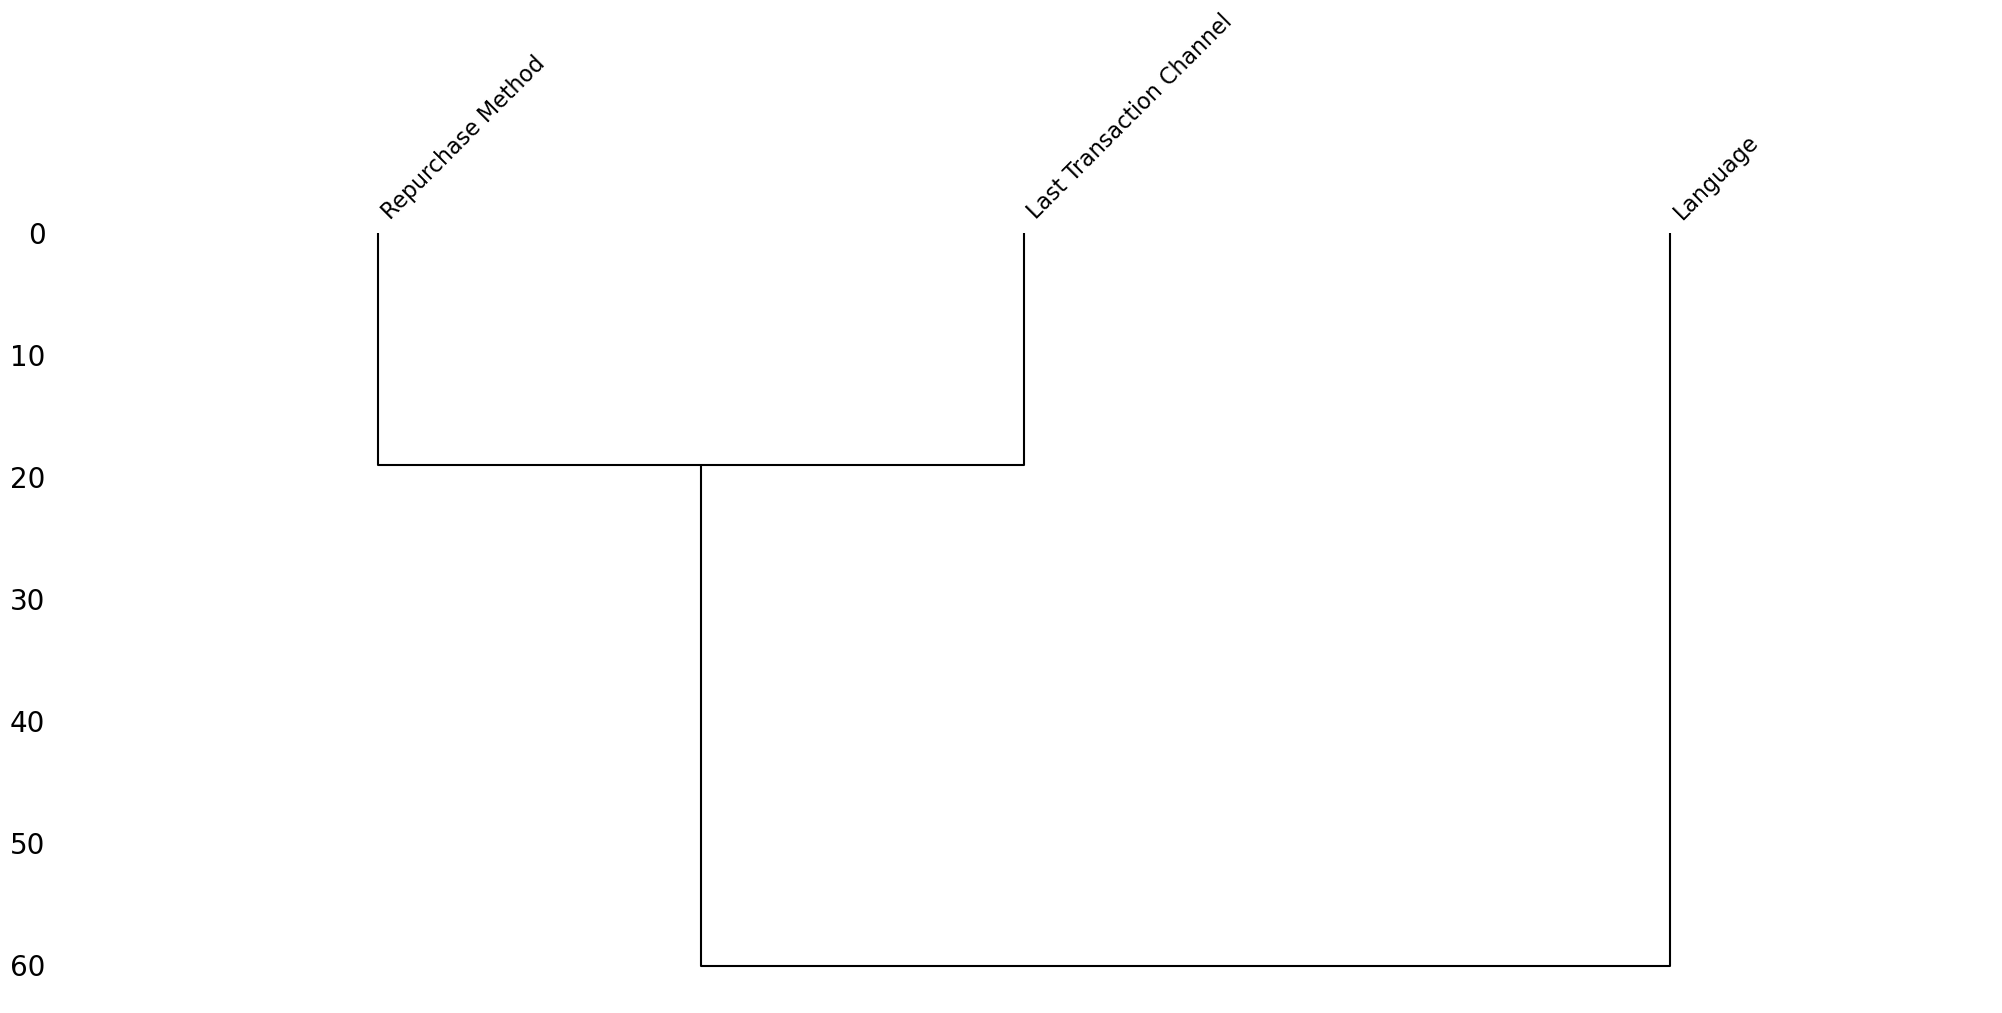

In [49]:
msn.dendrogram(cat_df_train);

## Interpretation:
* The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.
* Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on.
* Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly

## Note: 
If the feature with the missing values is irrelevant or correlates highly to another feature, then it would be acceptable to remove that column. 

In [50]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OrdinalEncoder

In [51]:
def encode_categorical(df):
    '''function to encode non-null data and replace it in the original data'''
    df_enc = df.copy()
    def encode(data):
        data_col = data.copy()
        encoder = OrdinalEncoder()
        #retains only non-null values
        nonulls = np.array(data_col.dropna())
        #reshapes the data for encoding
        impute_reshape = nonulls.reshape(-1,1)
        #encode date
        impute_ordinal = encoder.fit_transform(impute_reshape)
    
        #Assign back encoded values to non-null values
        data_col.loc[data_col.notnull()] = np.squeeze(impute_ordinal)
        return data_col
    
    for col in df_enc.columns:
        df_enc[col] = encode(df_enc[col])
    return df_enc
cat_df_enc = encode_categorical(cat_df_train)
cat_df_encTE = encode_categorical(cat_df_test)


# Imputation

## Now, we can imput missing values

In [52]:
im_br = IterativeImputer(random_state=24, estimator=ExtraTreesClassifier(n_estimators=10))
cat_df_imp = pd.DataFrame(im_br.fit_transform(cat_df_enc),
                          index=cat_df_enc.index,
                          columns=cat_df_enc.columns)
cat_df_impTE = pd.DataFrame(im_br.transform(cat_df_encTE),
                          index=cat_df_encTE.index,
                          columns=cat_df_encTE.columns)
cat_df_impTE.head(10)

,Last Transaction Channel,Repurchase Method,Language
1071,3.0,0.0,2.0
7822,0.0,0.0,2.0
13617,0.0,0.0,2.0
291,4.0,1.0,2.0
9295,2.0,1.0,2.0
450,2.0,0.0,2.0
4203,0.0,0.0,2.0
4976,0.0,0.0,2.0
13174,4.0,1.0,2.0
4985,0.0,0.0,2.0


In [53]:
cat_df_train.head(10)

,Last Transaction Channel,Repurchase Method,Language
11552,MAIL,NOTICE,English
6353,WEB,NOTICE,English
6653,WEB,AUTO RENEW,NaN
11179,WEB,NOTICE,English
12746,MAIL,NOTICE,English
15917,NaN,NOTICE,NaN
9059,MAIL,NOTICE,English
13533,WEB,NOTICE,English
6169,MAIL,NOTICE,English
9877,MAIL,NOTICE,English


In [54]:
cat_df_impTE.shape

(3235, 3)

In [55]:
def decode_cat_encodings(df_encoded):
    df = pd.DataFrame(df_encoded, columns=ohe_cat_cols)
    
    for col_idx, col in enumerate(ohe_cat_cols):
        uniq_lst_enc = df[col].unique().tolist()
        level_mapper = {num: cat for num, cat in zip(uniq_lst_enc, list_of_cats[col_idx])}
        df[col] = df[col].map(level_mapper)
    return df

In [56]:
def decode_cat_encodingsTE(df_encoded):
    df = pd.DataFrame(df_encoded, columns=ohe_cat_cols)
    
    for col_idx, col in enumerate(ohe_cat_cols):
        uniq_lst_enc = df[col].unique().tolist()
        level_mapper = {num: cat for num, cat in zip(uniq_lst_enc, list_of_catsTE[col_idx])}
        df[col] = df[col].map(level_mapper)
    return df

In [57]:
X_train_catIM = decode_cat_encodings(cat_df_imp)
X_test_catIM= decode_cat_encodingsTE(cat_df_impTE)

In [50]:
# For Linear reg
# yl_train = y_train
# yl_test = y_test

# Target variable y: Binarize

In [58]:
# def binarize_y(ser):
#     fun=lambda x: 1 if x>0 else 0
#     return ser.apply(fun)

#     or
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.47)
bi = bi.fit(y_train.values.reshape(-1,1))


y_b_train = bi.transform(y_train.values.reshape(-1,1))
y_b_test =  bi.transform(y_test.values.reshape(-1,1))
 

In [59]:
# # fillna in the categorical columns
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy = "most_frequent")# defeault missing_values is Nan
# imputer.fit(X_train[ohe_cat])
# #imputer.fit(X_train[prod_cols])
# X_train_im = imputer.transform(X_train[ohe_cat])
# X_test_im = imputer.transform(X_test[ohe_cat])
# # X_train[prod_cols]=imputer.transform(X_train[prod_cols])
# # X_test[prod_cols] = imputer.transform(X_test[prod_cols])

In [53]:
# X_train_im = pd.DataFrame(X_train_im,columns = ohe_cat, index = X_train.index)
# X_test_im = pd.DataFrame(X_test_im,columns = ohe_cat, index = X_test.index)

## Product columns data frame: nonnull

In [54]:
# X_train_prod = X_train[prod].fillna(0)
# X_test_prod = X_test[prod].fillna(0)

## Prod_cols: 'YY' and 'Y' to 1, "N" to 0

In [55]:
def prod_binarize(df):
    map_dic = {"YY":1,"Y":1,"N":0,np.nan:0}
    df = df.replace(map_dic)
    return df
#X_train_prod = prod_binarize(X_train)
#X_test_prod = prod_binarize(X_test)
X_train_prod = prod_binarize(bool_df_train)
X_test_prod = prod_binarize(bool_df_test)

In [56]:
X_train_num = X_train.loc[:,num_cols]
X_test_num = X_test.loc[:,num_cols]

# OneHotEncoder


In [57]:
X_train_ohe = X_train_catIM
X_test_ohe = X_test_catIM
#X_test_ohe

In [58]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(X_train_catIM)
X_train_wohe = ohe.transform(X_train_catIM)
X_test_wohe = ohe.transform(X_test_catIM)

In [59]:
X_test_wohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [60]:
# categories_ returns all values of each column
ohe.categories_

[array(['AUTO RENEW', 'MAIL', 'Other', 'PHONE', 'WEB'], dtype=object),
 array(['AUTO RENEW', 'NOTICE'], dtype=object),
 array(['Arabic', 'Chinese', 'English', 'German', 'Greek', 'Hebrew',
        'Hindi', 'Italian', 'Japanese', 'Other', 'Polish', 'Portuguese',
        'Russian', 'Spanish'], dtype=object)]

## Categorical DataFrame:

In [61]:
# wrap into DataFrame(X_train[cat_cols]):
def dummy_adder(array):
    dummy_cols=[]
    for col,cat_set in zip(ohe_cat_cols,ohe.categories_):
        for cat in cat_set:
            dummy_cols.append(col +'_'+ str(cat))
    return pd.DataFrame(array,columns = dummy_cols, index = X_train_ohe.index)
X_train_ohe = dummy_adder(X_train_wohe)


In [62]:
def dummy_adderTE(array):
    dummy_cols=[]
    for col,cat_set in zip(ohe_cat_cols,ohe.categories_):
        for cat in cat_set:
            dummy_cols.append(col +'_'+ str(cat))
    return pd.DataFrame(array,columns = dummy_cols, index = X_test_ohe.index)
X_test_ohe = dummy_adderTE(X_test_wohe)
X_test_ohe.shape

(3234, 21)

# Standardize the num_cols:

In [63]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train_num)
X_train_std = ss.transform(X_train_num)
X_test_std = ss.transform(X_test_num)

In [64]:
X_test_std.std() ## observation: the mean(0.9626426001) and std of the test set after 
                 # Standardize/normalize are approximately 0 and 1 resp.(not exactly)
                 # But for the train set they are exactly 0 and 1 resp.

1.0044696201296957

## Numerical DataFrame:

In [65]:
X_train_std = pd.DataFrame(X_train_std,columns=num_cols, index = X_train_num.index)
X_test_std = pd.DataFrame(X_test_std,columns=num_cols, index = X_test_num.index)


# Concatenate the 3 DataFrames:

In [66]:
X_train_prepared = pd.concat([X_train_std,X_train_ohe, X_train_prod],axis = 1)
X_test_prepared =  pd.concat([X_test_std,X_test_ohe, X_test_prod],axis = 1)

In [67]:
X_test_prepared.head(3)


,Historical Sales Volume,Number of Prior Year Transactions,Number of Employees,months_since_first_purchase,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_MAIL,Last Transaction Channel_Other,Last Transaction Channel_PHONE,Last Transaction Channel_WEB,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Language_Arabic,Language_Chinese,Language_English,Language_German,Language_Greek,Language_Hebrew,Language_Hindi,Language_Italian,Language_Japanese,Language_Other,Language_Polish,Language_Portuguese,Language_Russian,Language_Spanish,Desk,Computer,Office Supplies,Toner,Insurance,Executive Chair,Standard Chair,Monitor,Printer
1071,0.047158,-0.319913,-0.154209,-0.839796,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0
7822,-0.288177,0.849088,-0.436373,1.977849,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0
13616,0.937024,0.589310,-0.154209,0.227410,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0


## Balacing target/labels -didn't help for this project but good to keep


[Docs](https://imbalanced-learn.readthedocs.io/en/stable/)

`pip install -U imbalanced-learn`

In [68]:
# !pip install -U imbalanced_learn

Build model on balanced dataset

    **DO NOT balance the test set... leave that data representative of the true distribution**

### Undersampling

In [69]:
from imblearn.under_sampling import RandomUnderSampler

In [70]:
# undersample majority class
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train_prepared, y_b_train)


In [71]:
y_resampled=pd.Series(y_resampled, index = X_resampled.index)
y_resampled.value_counts()

1.0    3477
0.0    3477
dtype: int64

## Over sampling

**Over-Sampling using [`SMOTENC`](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) - this is for cases when you have a mixture of continuous and categorical data**

In [72]:
from imblearn.over_sampling import SMOTENC

In [73]:
# create boolean list where categorical columns exist
cat_columns = X_train_prepared.iloc[:4, 4:].columns
cat_bools = [True if col in cat_columns else False for col in X_train_prepared.columns]

# instantiate SMOTENC
smote_nc = SMOTENC(categorical_features=cat_bools, random_state=0)

# balance data
X_smotenc, y_smotenc = smote_nc.fit_resample(X_train_prepared, y_b_train)

---

---

# Class prediction

## GradientBoostingClassifier-all features

In [74]:
# all features and unbalanced- __better performance__
grad_boost = GradientBoostingClassifier()
grad_boost=grad_boost.fit(X_train_prepared,y_b_train)
y_grad_pred = grad_boost.predict(X_test_prepared)


### balanced_undersampling(not good result)

# grad_boost=grad_boost.fit(X_resampled,y_resampled)
# y_grad_pred = grad_boost.predict(X_test_prepared)


### balanced_oversampling

# gbt3 = GradientBoostingClassifier()
# gbt3.fit(X_smotenc, y_smotenc)
# y_grad_pred = gbt3.predict(X_test_prepared)


# selected features

# grad_boost=grad_boost.fit(X_train_gbr,y_b_train)
# y_grad_pred = grad_boost.predict(X_test_gbr)


## predic_proba- and probability of class 1(responding)

In [75]:
y_grad_proba = grad_boost.predict_proba(X_test_prepared)
y_prob_response = y_grad_proba[:,1]
y_prob_response = pd.Series(y_prob_response,index = y_test.index)

In [76]:
# the classes can be seen by:
grad_boost.classes_

array([0., 1.])

## Performance Evaluation

In [77]:
# accuracy score
grad_boost.score(X_test_prepared,y_b_test)


0.87569573283859

In [78]:
# cross_val_score
cross_val_score(grad_boost,X_train_prepared,y_b_train).mean()


0.8675785896549684

In [79]:
# classification_report
print(classification_report(y_b_test,y_grad_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      2333
         1.0       0.81      0.73      0.77       901

    accuracy                           0.88      3234
   macro avg       0.85      0.83      0.84      3234
weighted avg       0.87      0.88      0.87      3234



In [80]:
# confusion_matrix
cm = confusion_matrix(y_b_test,y_grad_pred)
print(f'confusion_matrix:\n{cm} \n\n Precision:{cm[1][1]/(cm[1][1]+cm[0][1])}')


confusion_matrix:
[[2177  156]
 [ 246  655]] 

 Precision:0.8076448828606658


## Feature importance-classifier

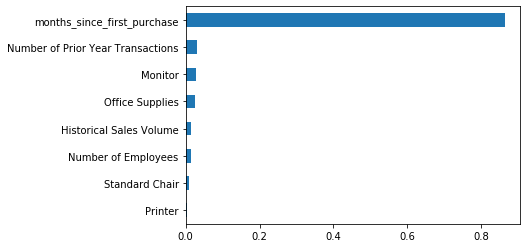

In [81]:
# feature importance in series form
import matplotlib.pyplot as plt
fi = pd.Series(grad_boost.feature_importances_, index = X_train_prepared.columns)#.sort_values(ascending = False)

# show the features in horizontal bar
plt.figsize = (8,8)  # size of the fig

# select the top 8 features
fi.nlargest(8).plot(kind = 'barh').invert_yaxis()

# to disable or not the figure box
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})

## Visualize results
out of project examples included

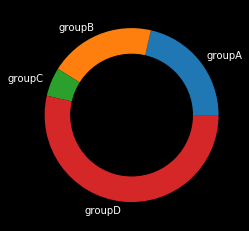

In [82]:

# library
import matplotlib.pyplot as plt

# Data
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]

# create a figure and set different background
fig = plt.figure()
fig.patch.set_facecolor('black')

# Change color of text
plt.rcParams['text.color'] = 'white'

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='black')

# Pieplot + circle on it
plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


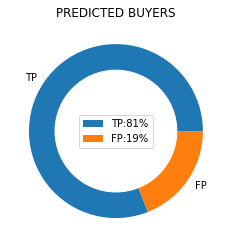

In [83]:
# library
import matplotlib.pyplot as plt

# Data
names='TP', 'FP'
size=[81,19]

# create a figure and set different background
fig = plt.figure()
fig.patch.set_facecolor('white')

# Change color of text
plt.rcParams['text.color'] = 'black'

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Pieplot + circle on it
plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('PREDICTED BUYERS')
plt.legend(['TP:81%','FP:19%'],loc = 10)
plt.show()


## Part of the project to visualize prediction precisions
# saving figure in working directory included

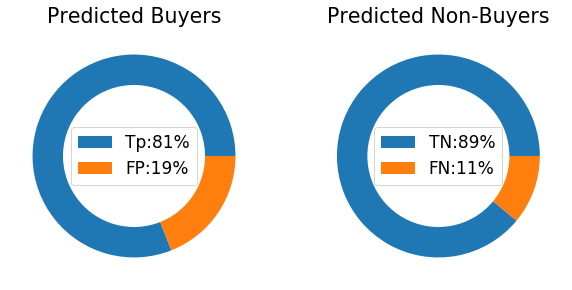

In [93]:
# library
#plt.rcParams['font.size'] = 17
buyer_df =pd.DataFrame({'Predicted Buyers':[81,19],'Predicted Non-Buyers':[89,11]})
leg = [['Tp:81%','FP:19%'],['TN:89%','FN:11%']]
fig,ax = plt.subplots(1,2,figsize=(10,8))
for ax,col,leg in zip(ax,buyer_df,leg):
    ax.pie(buyer_df[col],wedgeprops=dict(width=.3))# width/thickness of circle
    ax.set(title = col, aspect = 'equal')
    ax.legend(leg,loc = 10) # loc =10, location of the legend to be center
fig.savefig('precision-recall.png') # saving the figure in working directory
    

## Pie plot- out of the project

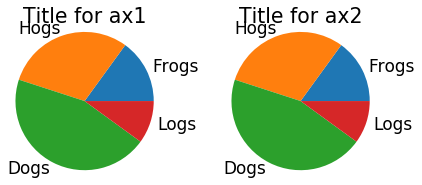

In [94]:
import matplotlib.pyplot as plt
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(fracs, labels=labels, radius = 1.2)
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(fracs, labels=labels, radius = 1.2)
ax1.set_title('Title for ax1')
ax2.set_title('Title for ax2')
plt.show()

## About pyplot.suplots()

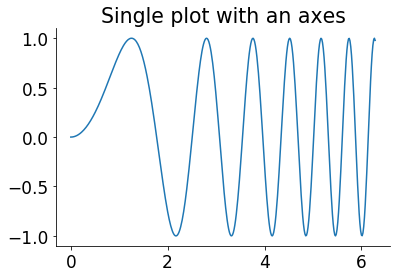

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# a figure with just one subplot
fig,ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Single plot with an axes');


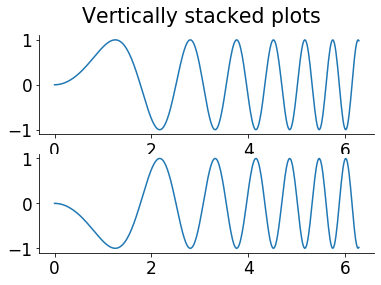

In [96]:
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

## stacking subplots in one direction
fig, ax = plt.subplots(2)
fig.suptitle('Vertically stacked plots')# title of the figure
ax[0].plot(x,y)
ax[1].plot(x,-y);

##  another similar option
# fig, (ax1, ax2) = plt.subplots(2)
# fig.suptitle('Vertically stacked subplots')
# ax1.plot(x, y)
# ax2.plot(x, -y);

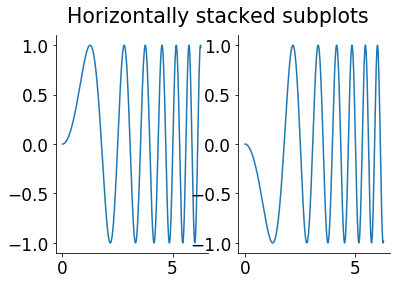

In [97]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

## side by side subplots
# fig, (ax1, ax2) = plt.subplots(1,2)
# fig.suptitle('Horizontally stacked subplots')
# ax1.plot(x, y)
# ax2.plot(x, -y);

##   or 
fig, ax = plt.subplots(1, 2) # is a one dimensional array. so, use 1D array indexing ax[0]
fig.suptitle('Horizontally stacked subplots')
ax[0].plot(x, y)
ax[1].plot(x, -y);


#### However this is two dimensional array: use ax[0,0] instead of ax[0]
# fig, axs = plt.subplots(2, 2)
# axs[0, 0].plot(x, y)
# #axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# # axs[0, 1].set_title('Axis [0, 1]')
# # axs[1, 0].plot(x, -y, 'tab:green')
# # axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# #axs[1, 1].set_title('Axis [1, 1]');

## pyplot.imshow()
The imshow() function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.

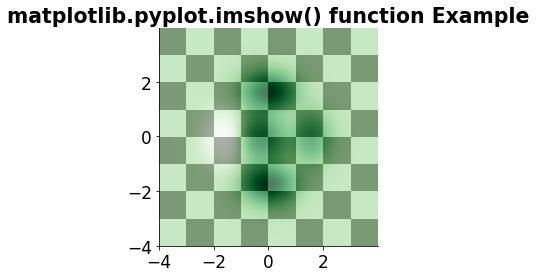

In [98]:
from matplotlib.colors import LogNorm 
      
dx, dy = 0.015, 0.05
x = np.arange(-4.0, 4.0, dx) 
y = np.arange(-4.0, 4.0, dy) 
X, Y = np.meshgrid(x, y) 
   
extent = np.min(x), np.max(x), np.min(y), np.max(y) 
   
Z1 = np.add.outer(range(8), range(8)) % 2
plt.imshow(Z1, cmap ="binary_r", interpolation ='nearest', 
                               extent = extent, alpha = 1) 
   
def geeks(x, y): 
    return (1 - x / 2 + x**5 + y**6) * np.exp(-(x**2 + y**2)) 
   
Z2 = geeks(X, Y) 
   
plt.imshow(Z2, cmap ="Greens", alpha = 0.7,  
           interpolation ='bilinear', extent = extent) 
  
plt.title('matplotlib.pyplot.imshow() function Example',  
                                     fontweight ="bold") 
plt.show() 

# ROC-Curve

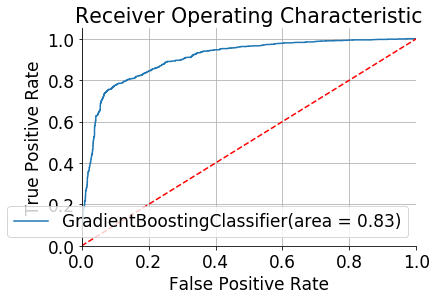

In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_b_test,y_grad_pred)
fpr, tpr, thresholds = roc_curve(y_b_test, y_prob_response)
plt.figure()
plt.plot(fpr,tpr,label = "GradientBoostingClassifier(area = %.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.grid()
plt.show();



## Tuning on threshold

In [90]:
## optimal threshold == 0.47

In [123]:
# testing classification preds
y_prob_response = grad_boost.predict_proba(X_test_prepared)[:,1]

# possible thresholds
thresholds_test = np.linspace(min(y_prob_response), 
                               max(y_prob_response) - 0.1, 100)

# list to hold scores on train and test
test_f1_scores = []

for t in thresholds_test:
    test_f1_scores.append(f1_score(
        y_b_test, y_prob_response > t, pos_label=1))

# #find optimal precision score
optimal_t = float(thresholds_test[test_f1_scores==max(test_f1_scores)])
print("Threshold maximising f1 score - {}".format(optimal_t))


Threshold maximising f1 score - 0.4722149810430604


In [124]:
print(classification_report(y_b_test, y_prob_response > optimal_t))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      2333
         1.0       0.80      0.74      0.77       901

    accuracy                           0.88      3234
   macro avg       0.85      0.83      0.84      3234
weighted avg       0.87      0.88      0.88      3234



## Features for GradientBoosting Regressor

In [100]:
X_train_feat = X_train_prepared[[
       'Historical Sales Volume', 'Number of Prior Year Transactions',
       'Number of Employees', 'months_since_first_purchase',
       'Last Transaction Channel_AUTO RENEW', 'Last Transaction Channel_MAIL',
       'Last Transaction Channel_Other', 'Last Transaction Channel_PHONE',
       'Last Transaction Channel_WEB', 'Repurchase Method_AUTO RENEW',
       'Repurchase Method_NOTICE', 
       'Language_English', 'Language_Greek', 
        'Desk',
       'Computer', 'Office Supplies', 'Toner', 'Insurance', 'Executive Chair',
       'Standard Chair', 'Monitor', 'Printer'    
      
        ]]
X_test_feat = X_test_prepared[[
       'Historical Sales Volume', 'Number of Prior Year Transactions',
       'Number of Employees', 'months_since_first_purchase',
       'Last Transaction Channel_AUTO RENEW', 'Last Transaction Channel_MAIL',
       'Last Transaction Channel_Other', 'Last Transaction Channel_PHONE',
       'Last Transaction Channel_WEB', 'Repurchase Method_AUTO RENEW',
       'Repurchase Method_NOTICE', 
       'Language_English', 'Language_Greek', 
        'Desk',
       'Computer', 'Office Supplies', 'Toner', 'Insurance', 'Executive Chair',
       'Standard Chair', 'Monitor', 'Printer'    
          
       ]]



# X_train_gbr = X_train_prepared[[
#     'Historical Sales Volume', 'Number of Prior Year Transactions',
#      'Number of Employees','months_since_first_purchase',
#             'Last Transaction Channel_WEB',
#        'Repurchase Method_AUTO RENEW',     'Desk',  'Computer', 
#     'Office Supplies',    'Toner',       'Standard Chair',
#     'Monitor', 'Printer']]
# X_test_gbr = X_test_prepared[[
#     'Historical Sales Volume', 'Number of Prior Year Transactions',
#      'Number of Employees','months_since_first_purchase',
#                'Last Transaction Channel_WEB',
#        'Repurchase Method_AUTO RENEW',       'Desk',   'Computer', 
#     'Office Supplies',     'Toner',      'Standard Chair',
#     'Monitor', 'Printer']]

# X_train_RFE = X_train_prepared[[
#     'Historical Sales Volume','Number of Prior Year Transactions',
#     'Number of Employees','months_since_first_purchase',
#     'Last Transaction Channel_PHONE',
#     'Last Transaction Channel_WEB',     
#     'Repurchase Method_NOTICE',  
#     'Language_Spanish',
#     'Computer','Office Supplies','Toner', 'Executive Chair','Monitor']]
# X_test_RFE = X_test_prepared[[
#     'Historical Sales Volume','Number of Prior Year Transactions',
#     'Number of Employees','months_since_first_purchase',
#     'Last Transaction Channel_PHONE',
#     'Last Transaction Channel_WEB',     
#     'Repurchase Method_NOTICE',  
#     'Language_Spanish',
#     'Computer','Office Supplies','Toner', 'Executive Chair','Monitor' ]]



# Regression Models

## GradientBoostingRegressor-selected features

In [101]:
# gradboosting reg. in place of linear
grad_reg = GradientBoostingRegressor(n_estimators =200, max_depth = 5, random_state = 10 )
grad_reg = grad_reg.fit(X_train_feat,y_train)
y_grad_reg_pred = grad_reg.predict(X_test_feat)
y_grad_estimate = pd.Series(y_grad_reg_pred,index=X_test_feat.index)


## Performance Evaluation

In [102]:
# accuracy-r2_score
grad_reg.score(X_test_feat, y_test)


0.6073136627205804

## Regressor feature importance

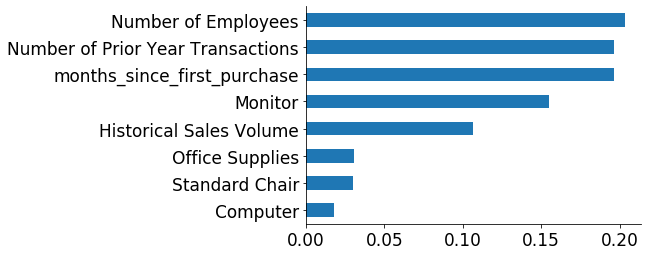

In [103]:
# feature imp with feature names
fi_reg = pd.Series(grad_reg.feature_importances_, index = X_train_feat.columns)#.sort_values(ascending = False)

# plot feat imp
plt.figsize = (8,8)
fi_reg.nlargest(8).plot(kind = 'barh').invert_yaxis()
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})

# save figure
plt.savefig('feat_imp_reg.png')

## regression on responders sub-set 

In [104]:
# y_train_resp = y_train[y_train>0]
# y_test_resp = y_test[y_test>0]
# X_train_resp = X_train_feat.loc[y_train_resp.index]
# X_test_resp = X_test_feat.loc[y_test_resp.index]


In [105]:
# grad_reg_sub = GradientBoostingRegressor()#n_estimators =200, max_depth = 5, random_state = 10 )
# grad_reg_sub = grad_reg_sub.fit(X_train_resp,y_train_resp)
# y_sub_pred = grad_reg_sub.predict(X_test_resp)
# y_sub_estimate = pd.Series(y_sub_pred,index=X_test_resp.index)



In [106]:
## accuracy
#grad_reg_sub.score(X_test_resp, y_test_resp)

In [107]:
# #cross_val_score
#cross_val_score(grad_reg_sub,X_train_resp,y_train_resp).mean()

In [108]:
# prob_responding = grad_boost.predict_proba(X_test_prepared)[:,1]# all test set
# prob_responding = pd.Series(prob_responding,index = X_test_prepared.index)
# prob_only_resp = prob_responding.loc[X_test_resp.index] # included in profit formula

In [109]:
## non-responders index
# non_idx =[]
# for i in X_test_prepared.index:
#     if i not in X_test_resp.index:
#         non_idx.append(i)
# non_estimate = pd.Series(0,index = non_idx)
# all_estimate = pd.concat([y_sub_estimate,non_estimate],axis = 0)
# y_prob_response=pd.Series(y_prob_response,index =X_test_prepared.index )#prob-of all test sets
# exp_profit = 0.22*all_estimate*y_prob_response-8.4*y_prob_response-45.65


# y_pos = y_test[y_test>0]
# y_zero = y_test[y_test==0]
# act_prof1 = 0.22*y_pos-54.05 
# act_prof2 = 0.22*y_zero-45.65

# actual_profit = pd.concat([act_prof1,act_prof2],axis=0)


In [110]:
# ### df_expected vs actual profit
# df_prof_sub = pd.concat([exp_profit,actual_profit],axis =1)
# df_prof_sub.columns = ['exp_profit','actual_profit']

# ### rank values of 'exp_profit'
# df_prof_sub['rank'] = df_prof_sub["exp_profit"].rank(method ='first')

# ###create deciles by rank
# df_prof_sub['deciles'] = pd.qcut(df_prof_sub['rank'].values,10).codes# .codes (also works)


# ls = df_prof_sub['deciles'].values
# ls1=[]
# for i in ls:
#     m = df_prof_sub[df_prof_sub['deciles']==i].mean()
#     ls1.append(m)
    
# a_profit=[]
# e_profit =[]
# for l in ls1:
#     a_profit.append(l[1])
#     e_profit.append(l[0])

# a_profit = np.array(a_profit)
# e_profit = np.array(e_profit)



In [111]:

####df_prof_sub[df_prof_sub['deciles']==8].describe()
#df_prof_sub.groupby(df_prof_sub['deciles']).mean().sort_values('deciles',ascending = False)

## Tuning on regression

In [106]:
param_grid = {
    'learning_rate': [0.15,0.11,0.1],
    'n_estimators': [50,250,116,200],
    'max_depth':  [4,5,6],
    'random_state': [25,11,0,15,42]
}
rscv = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(),
    param_distributions=param_grid)

In [107]:
rscv.fit(X_train_feat, y_train_feat)

In [133]:
# best parameters but score not improved over the above model( 60.27% )
rscv.best_params_

In [ ]:
gbr2 = GradientBoostingRegressor(**rscv.best_params_)
gbr2.fit(X_train_feat, y_train_feat)

In [ ]:
y_gbr_pred = gbr2.predict(X_test_feat)
gbr2.score(X_test_feat,y_test_feat)

---

## Logical but not convinsive result

## profitability when estimates of only responders

In [134]:
# 33sub set
# y_train_resp = y_train[y_train>0]
# y_test_resp = y_test[y_test>0]
# X_train_resp = X_train_feat.loc[y_train_resp.index]
# X_test_resp = X_test_feat.loc[y_test_resp.index]


# ##estimate only responders
# grad_reg_resp = GradientBoostingRegressor()
# grad_reg_resp = grad_reg_resp.fit(X_train_resp,y_train_resp)
# y_resp_estimate = pd.Series(grad_reg_resp.predict(X_test_resp),index = X_test_resp.index)# included in profit formula


In [ ]:
### acc.score
#grad_reg_resp.score(X_test_resp,y_test_resp)

In [ ]:
# ###predict_proba for responders
# prob_responding = grad_boost.predict_proba(X_test_prepared)[:,1]# all test set
# prob_responding = pd.Series(prob_responding,index = X_test_prepared.index)
# prob_only_resp = prob_responding.loc[X_test_resp.index] # included in profit formula

In [ ]:
# non-responders index
# non_idx =[]
# for i in X_test_prepared.index:
#     if i not in X_test_resp.index:
#         non_idx.append(i)
# non_estimate = pd.Series(0,index = non_idx)
# all_estimate = pd.concat([y_resp_estimate,non_estimate],axis = 0)
# y_prob_response=pd.Series(y_prob_response,index =X_test_prepared.index )#prob-of all test sets
# exp_profit = 0.22*all_estimate*y_prob_response-8.4*y_prob_response-45.65


# y_pos = y_test[y_test>0]
# y_zero = y_test[y_test==0]
# act_prof1 = 0.22*y_pos-54.05 #if i not in non_idx else -45.65
# act_prof2 = 0.22*y_zero-45.65

# actual_profit = pd.concat([act_prof1,act_prof2],axis=0)


In [ ]:
# df_expected vs actual profit
# df_prof_sub = pd.concat([exp_profit,actual_profit],axis =1)
# df_prof_sub.columns = ['exp_profit','actual_profit']
# #df_prof_sub.sort_values(by='exp_profit',ascending = False)
# df_prof_sub['rank'] = df_prof_sub["exp_profit"].rank(method ='first')
# df_prof_sub['deciles'] = pd.qcut(df_prof_sub['rank'].values,10).codes

# ls = range(10)
# ls1=[]

# for i in ls:
#     m = df_prof_sub[df_prof_sub['deciles']==i].mean()
#     ls1.append(m)
    
# act_lst=[]
# exp_lst =[]
# for l in ls1:
#     act_lst.append(l[1])
#     exp_lst.append(l[0])
# # deciles = pd.DataFrame([exp_lst],[act_lst],columns = ['exp_prof','act_prof'])
# # deciles
# act_lst = np.array(act_lst)

In [ ]:
# # make deciles
# num_records = pd.qcut(df_prof_sub['exp_profit'].values,10).value_counts(sort = False).values
# print(num_records)

In [ ]:
# # gradient_sub
# deciles = df_prof_sub.groupby(pd.qcut(df_prof_sub['exp_profit'],10)).mean()

# # add 'number of records' column
# #deciles['num_records'] = num_records

# # change name of index
# deciles.index.name = 'decile_sub'

# #round 'actual profit' to 2 decimal places
# deciles['actual_profit']=round(deciles['actual_profit'],2)


# # sort the deciles by 'exp_profit'
# deciles.sort_values(by = 'exp_profit', ascending = False)

# Better Option

## Expected vs actual profits-gradientboosting models

### Plot Comparision 'actual' and 'predicted'

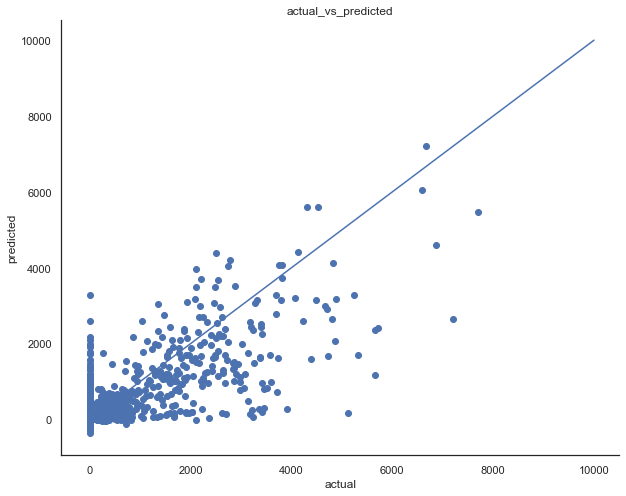

In [135]:
# all features
fig, ax = plt.subplots(1,1,figsize = (10,8))
ax.plot([0,10000],[0,10000])
ax.scatter(x=y_test,y = y_grad_reg_pred)
ax.set(xlabel = 'actual',ylabel = 'predicted',title = 'actual_vs_predicted');

In [155]:
# y_b_test to be size compatible
y_b_test = y_b_test.reshape(3234,)

In [157]:
# actual and expected profit
exp_profit = 0.22*y_prob_response*y_grad_estimate - 8.4*y_prob_response-45.65
actual_profit = 0.22*y_b_test*y_test - 8.4*y_b_test-45.65

1071    -45.650000
7822     -2.984019
13616   -45.650000
291     -45.650000
9294    -45.650000
           ...    
6217      5.018533
10298    41.943040
15077   -45.650000
839     -45.650000
11678     9.858952
Name: Campaign Period Sales, Length: 3234, dtype: float64

In [170]:
# array range starting from 1
(np.arange(10)+1)

# starting from 10
(np.arange(10)+1)[::-1]

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [180]:
## concatnate exp and actual profits
prof_df = pd.concat([exp_profit,actual_profit],axis = 1)

## set column names
prof_df.columns=['exp_prof','act_prof']

## set the 10 deciles
bin_labels =(np.arange(10)+1)[::-1]

## partition the dataframe in to 10 based in 'exp_prof'
prof_df['deciles']=pd.qcut(prof_df['exp_prof'],10,bin_labels)

## to find number of samples in each decile
prof_df['deciles'].value_counts()

## group them by deciles and sort them from top-bottom
prof_df_ranked = prof_df.groupby(prof_df['deciles']).mean().sort_values(by = 'deciles', ascending = False)


## use act_prof column in lift table

,exp_prof,act_prof
deciles,,
1,212.199829,310.600222
2,-9.138265,7.370889
3,-28.137099,-8.541426
4,-41.262605,-11.526418
5,-44.048964,-25.513267
6,-45.046703,-32.055052
7,-45.701619,-42.344673
8,-45.899257,-42.822816
9,-46.017091,-44.426814


## Profiling Customers in Deciles 1 and 2

In [207]:
### Extracting indexes in dec-1 and 2
decile_1_index = prof_df[prof_df['deciles']==1].index
decile_2_index = prof_df[prof_df['deciles']==2].index

# extracting dataframe of dec-1 and 2
decile_1 = X_test_prepared.loc[decile_1_index,:]
decile_2 = X_test_prepared.loc[decile_2_index,:]


## select most important features only

In [208]:
imp_cols = [
          'Historical Sales Volume', 'Number of Prior Year Transactions',
           'months_since_first_purchase','Computer', 'Office Supplies', 'Monitor'
           ]
decile_1_imp = decile_1.loc[:,imp_cols]
decile_2_imp = decile_2.loc[:,imp_cols] # or decile_1_imp = decile_1[imp_cols]


## Raw_decile-1 and 2 data

In [209]:
dec1_imp_raw = off_df.loc[decile_1.index,imp_cols]
dec2_imp_raw = off_df.loc[decile_2.index,imp_cols]


In [211]:
## need this for comparision: dec-1 and 2 with all deciles average
all_deciles = off_df.loc[X_test_prepared.index,imp_cols]

## data frame to excel

In [212]:
# saved as file name decile-1 and sheet name dec-1 
dec_1_exel = dec1_imp_raw.to_excel('decile_1.xlsx', sheet_name = 'dec-1')
dec_2_exel = dec2_imp_raw.to_excel('decile_2.xlsx', sheet_name = 'dec-2')


In [ ]:
# percentage of purchase of Monitor in the test set
(all_deciles['Monitor']=='Y').sum()/len(all_deciles)

## plt.rc-->read more

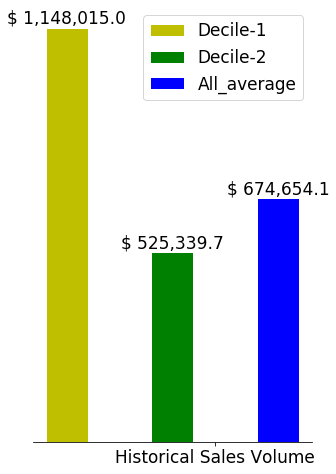

In [214]:
# Historical Sales Volume

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 8)
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = round(dec1_imp_raw['Historical Sales Volume'].mean(),1)
bars2 = round(dec2_imp_raw['Historical Sales Volume'].mean(),1)
bars3 = round(all_deciles['Historical Sales Volume'].mean(),1)
 
# Set position of bar on X axis
r1 = 0.25 ## first bar
r2 = 0.5  ## second bar
r3 = 0.75 ## third bars position
 
# Make the plot
bars1=plt.bar(r1, height = bars1, color='y', width=barWidth, edgecolor='white', label='Decile-1')
bars2=plt.bar(r2, height = bars2, color='g', width=barWidth, edgecolor='white', label='Decile-2')
bars3=plt.bar(r3, height = bars3, color='b', width=barWidth, edgecolor='white', label='All_average')
 
## Add xticks on the middle of the group bars
plt.xticks( [0.5+barWidth ], ['Historical Sales Volume'])

### add xlabel
#plt.xlabel('Historical Sales Volume', fontweight='bold')

### add text to top of bar
for bar in bars1+bars2+bars3:  # looping bars joined by '+'
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '$ {:,}'.format(height), ha='center', va='bottom')

    
### selecting bounding axex
plt.rc('axes.spines', **{'bottom':True, 'left':False, 'right':False, 'top':False})


### possible to hide axes values
ax = plt.gca()
ax.axes.yaxis.set_visible(False)  # to hide yaxis labels
#      or
# plt.spines['bottom'].set_color('white')
# plt.spines['top'].set_color('white') 
# plt.spines['right'].set_color('white')
# plt.spines['left'].set_color('white')
#Create legend & Show graphic


plt.legend(loc = 1)

### saving fig
fig.savefig('Historic-Sales.png')
plt.show()



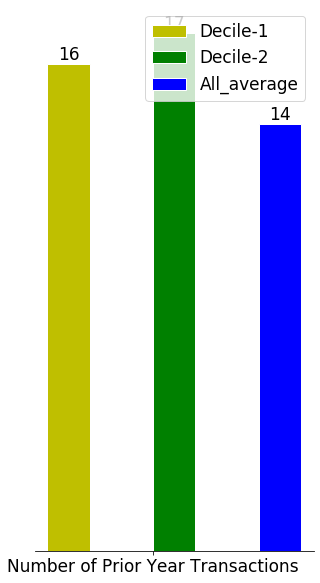

In [216]:
# Number of Prior Year transactions

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 10)
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = round(dec1_imp_raw['Number of Prior Year Transactions'].mean())#[12, 30, 1, 8, 22]
bars2 = round(dec2_imp_raw['Number of Prior Year Transactions'].mean())#[28, 6, 16, 5, 10]
bars3 = round(all_deciles['Number of Prior Year Transactions'].mean())
 
# Set position of bar on X axis
r1 = 0 #np.arange(len(bars1))
r2 = 0.25 #[x + barWidth for x in r1]
r3 = 0.5 # [x + barWidth for x in r2]
 
# Make the plot
bars1=plt.bar(r1, height = bars1, color='y', width=barWidth, edgecolor='white', label='Decile-1')
bars2=plt.bar(r2, height = bars2, color='g', width=barWidth, edgecolor='white', label='Decile-2')
bars3=plt.bar(r3, height = bars3, color='b', width=barWidth, edgecolor='white', label='All_average')
 
# Add xticks on the middle of the group bars
#plt.xlabel('Historical Sales Volume', fontweight='bold')
plt.xticks([ 0.1+barWidth ], ['Number of Prior Year Transactions'])

# add text to top of bar
for bar in bars1+bars2+bars3:  # looping bars joined by '+'
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    #plt.text(ax.get_x(), yval + .005, yval)
    
# selecting bounding axex
plt.rc('axes.spines', **{'bottom':True, 'left':False, 'right':False, 'top':False})
ax = plt.gca()
ax.axes.yaxis.set_visible(False)  # to hide yaxis labels
#      or
# plt.spines['bottom'].set_color('white')
# plt.spines['top'].set_color('white') 
# plt.spines['right'].set_color('white')
# plt.spines['left'].set_color('white')
#Create legend & Show graphic
plt.legend(loc = 1)
fig.savefig('Num-Trans.png')
plt.show()


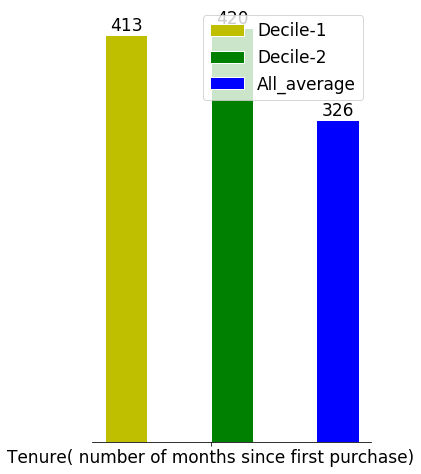

In [217]:
# Tenure(number of months)

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 8)
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = round(dec1_imp_raw['months_since_first_purchase'].mean(),1)#[12, 30, 1, 8, 22]
bars2 = round(dec2_imp_raw['months_since_first_purchase'].mean(),1)#[28, 6, 16, 5, 10]
bars3 = round(all_deciles['months_since_first_purchase'].mean(),1)
 
# Set position of bar on X axis
r1 = 0 #np.arange(len(bars1))
r2 = 0.25 #[x + barWidth for x in r1]
r3 = 0.5 # [x + barWidth for x in r2]
 
# Make the plot
bars1=plt.bar(r1, height = bars1, color='y', width=barWidth, edgecolor='white', label='Decile-1')
bars2=plt.bar(r2, height = bars2, color='g', width=barWidth, edgecolor='white', label='Decile-2')
bars3=plt.bar(r3, height = bars3, color='b', width=barWidth, edgecolor='white', label='All_average')
 
# Add xticks on the middle of the group bars
#plt.xlabel('Historical Sales Volume', fontweight='bold')
plt.xticks([ 0.1+barWidth ], ['Tenure( number of months since first purchase)'])

# add text to top of bar
for bar in bars1+bars2+bars3:  # looping bars joined by '+'
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height,'%d' % height , ha='center', va='bottom')
   # plt.annotate('{:.0%}'.format(height))#, ( height + 0.01))
    
# selecting bounding axex
plt.rc('axes.spines', **{'bottom':True, 'left':False, 'right':False, 'top':False})
ax = plt.gca()
ax.axes.yaxis.set_visible(False)  # to hide yaxis labels
#      or
# plt.spines['bottom'].set_color('white')
# plt.spines['top'].set_color('white') 
# plt.spines['right'].set_color('white')
# plt.spines['left'].set_color('white')
#Create legend & Show graphic
plt.legend(loc = 1)
fig.savefig('tenure.png')
plt.show()



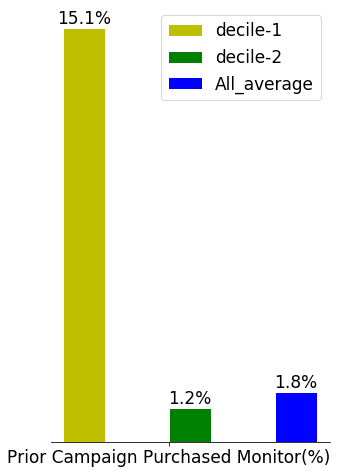

In [218]:
# monitor purchase

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 8)
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = (dec1_imp_raw['Monitor']=='Y').sum()/len(dec1_imp_raw['Monitor'])
bars2 = (dec2_imp_raw['Monitor']=='Y').sum()/len(dec2_imp_raw['Monitor']) 
bars3 = (all_deciles['Monitor']=='Y').sum()/len(all_deciles)
 
# Set position of bar on X axis
r1 = 0 #np.arange(len(bars1))
r2 = 0.25 #[x + barWidth for x in r1]
r3 = 0.5 # [x + barWidth for x in r2]
 
# Make the plot
bars1=plt.bar(r1, height = bars1, color='y', width=barWidth, edgecolor='white', label='decile-1')
bars2=plt.bar(r2, height = bars2, color='g', width=barWidth, edgecolor='white', label='decile-2')
bars3=plt.bar(r3, height = bars3, color='b', width=barWidth, edgecolor='white', label='All_average')
 
# Add xticks on the middle of the group bars
#plt.xlabel('Historical Sales Volume', fontweight='bold')
plt.xticks([ 0.1+barWidth ], ['Prior Campaign Purchased Monitor(%)'])

# add text to top of bar
for bar in bars1+bars2+bars3:  # looping bars joined by '+'
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '{:.1%}'.format( height), ha='center', va='bottom')
    #plt.text(ax.get_x(), yval + .005, yval)
    
# selecting bounding axex
plt.rc('axes.spines', **{'bottom':True, 'left':False, 'right':False, 'top':False})
ax = plt.gca()
ax.axes.yaxis.set_visible(False)  # to hide yaxis labels
#      or
# plt.spines['bottom'].set_color('white')
# plt.spines['top'].set_color('white') 
# plt.spines['right'].set_color('white')
# plt.spines['left'].set_color('white')
#Create legend & Show graphic
plt.legend(loc = 1)
fig.savefig('monitor_purchased.png')
plt.show()

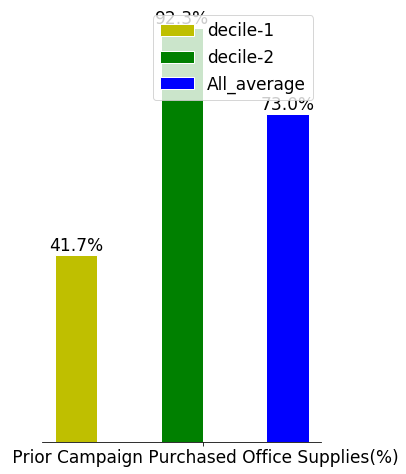

In [219]:
# Office Supplies purchase

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 8)
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = (dec1_imp_raw['Office Supplies']=='Y').sum()/len(dec1_imp_raw['Office Supplies']) 
bars2 = (dec2_imp_raw['Office Supplies']=='Y').sum()/len(dec2_imp_raw['Office Supplies']) 
bars3 = (all_deciles['Office Supplies']=='Y').sum()/len(all_deciles)
 
# Set position of bar on X axis
r1 = 0 #np.arange(len(bars1))
r2 = 0.25 #[x + barWidth for x in r1]
r3 = 0.5 # [x + barWidth for x in r2]
 
# Make the plot
bars1=plt.bar(r1, height = bars1, color='y', width=barWidth, edgecolor='white', label='decile-1')
bars2=plt.bar(r2, height = bars2, color='g', width=barWidth, edgecolor='white', label='decile-2')
bars3=plt.bar(r3, height = bars3, color='b', width=barWidth, edgecolor='white', label='All_average')
 
# Add xticks on the middle of the group bars
#plt.xlabel('Historical Sales Volume', fontweight='bold')
plt.xticks([ 0.2+barWidth ], [' Prior Campaign Purchased Office Supplies(%)'])

# add text to top of bar
for bar in bars1+bars2+bars3:  # looping bars joined by '+'
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '{:.1%}'.format( height), ha='center', va='bottom')
    #plt.text(ax.get_x(), yval + .005, yval)
    
# selecting bounding axex
plt.rc('axes.spines', **{'bottom':True, 'left':False, 'right':False, 'top':False})
ax = plt.gca()
ax.axes.yaxis.set_visible(False)  # to hide yaxis labels
#      or
# plt.spines['bottom'].set_color('white')
# plt.spines['top'].set_color('white') 
# plt.spines['right'].set_color('white')
# plt.spines['left'].set_color('white')
#Create legend & Show graphic
plt.legend(loc = 1)
fig.savefig('Office Supplies.png')
plt.show()

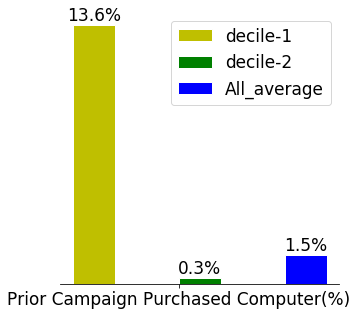

In [220]:
# Computer purchase

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = (dec1_imp_raw['Computer']=='Y').sum()/len(dec1_imp_raw['Computer']) 
bars2 = (dec2_imp_raw['Computer']=='Y').sum()/len(dec2_imp_raw['Computer']) 
bars3 = (all_deciles['Computer']=='Y').sum()/len(all_deciles)
 
# Set position of bar on X axis
r1 = 0 #np.arange(len(bars1))
r2 = 0.25 #[x + barWidth for x in r1]
r3 = 0.5 # [x + barWidth for x in r2]
 
# Make the plot
bars1=plt.bar(r1, height = bars1, color='y', width=barWidth, edgecolor='white', label='decile-1')
bars2=plt.bar(r2, height = bars2, color='g', width=barWidth, edgecolor='white', label='decile-2')
bars3=plt.bar(r3, height = bars3, color='b', width=barWidth, edgecolor='white', label='All_average')
 
# Add xticks on the middle of the group bars
#plt.xlabel('Historical Sales Volume', fontweight='bold')
plt.xticks([ 0.1+barWidth ], ['Prior Campaign Purchased Computer(%)'])

# add text to top of bar
for bar in bars1+bars2+bars3:  # looping bars joined by '+'
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '{:.1%}'.format( height), ha='center', va='bottom')
    #plt.text(ax.get_x(), yval + .005, yval)
    
# selecting bounding axex
plt.rc('axes.spines', **{'bottom':True, 'left':False, 'right':False, 'top':False})
ax = plt.gca()
ax.axes.yaxis.set_visible(False)  # to hide yaxis labels
#      or
# plt.spines['bottom'].set_color('white')
# plt.spines['top'].set_color('white') 
# plt.spines['right'].set_color('white')
# plt.spines['left'].set_color('white')
#Create legend & Show graphic
plt.legend(loc = 1)
fig.savefig('Computer.png')
plt.show()

No handles with labels found to put in legend.


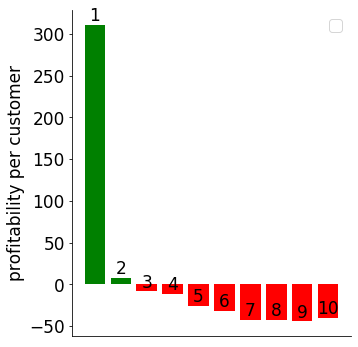

In [222]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (5, 6)
# set width of bar
barWidth = 0.1
 
# set height of bar
labels = range(1,11)
deciles = np.array([310.6, 7.4, -8.5,-11.5,-25.5,-32.1,-42.3,-42.8,-44.4,-40.2])
bars = plt.bar(range(len(deciles)), deciles,color=np.where(deciles>0, 'g', 'r')) # label=[i for i,j in enumerate(deciles)])#, width=barWidth, edgecolor='white')

# deciles.plot(kind='bar',
#                              color=deciles.positive.map({True: 'g', False: 'r'}))
#bars1 = deciles[0]
#bars[0]
#  = round(all_deciles['months_since_first_purchase'].mean(),1)
#for i,num in enumerate(deciles):
    
# Set position of bar on X axis
# for i,num in enumerate(deciles):
#     r1 = 0 #np.arange(len(bars1))
# #     r2 = 0.25 #[x + barWidth for x in r1]
# #     r3 = 0.5 # [x + barWidth for x in r2]
#     bars=plt.bar(r1, height = num, color='y', width=barWidth, edgecolor='white', label=i)
#     #plt.xticks([ 0.1+barWidth ], ['Deciles'])
#     r1+=0.25
    
# #Make the plot
# # bars1=plt.bar(r1, height = bars1, color='y', width=barWidth, edgecolor='white', label='Decile-1')
# # bars2=plt.bar(r2, height = bars2, color='g', width=barWidth, edgecolor='white', label='Decile-2')
# # bars3=plt.bar(r3, height = bars3, color='b', width=barWidth, edgecolor='white', label='All_average')
 
# # # Add xticks on the middle of the group bars
#plt.xlabel('Deciles', fontweight='bold')
plt.ylabel('profitability per customer',)# fontweight='bold')
plt.xticks([ 3.5+barWidth ], ['Deciles'], )
#plt.xticks([ 0.1+barWidth ], ['Tenure( number of months since first purchase)'])

# # add text to top of bar
for bar,label in zip(bars,labels):  # looping bars joined by '+'
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height,label , ha='center', va='bottom',)
#    # plt.annotate('{:.0%}'.format(height))#, ( height + 0.01))
    
# selecting bounding axex
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
ax = plt.gca()
ax.axes.xaxis.set_visible(False)  # to hide yaxis labels
#      or
# plt.spines['bottom'].set_color('white')
# plt.spines['top'].set_color('white') 
# plt.spines['right'].set_color('white')
# plt.spines['left'].set_color('white')
#Create legend & Show graphic
plt.legend()
#fig.savefig('tenure.png')
plt.show()

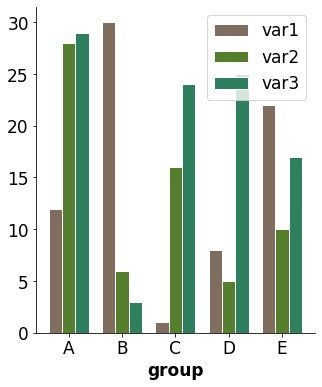

In [223]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

## RandomForestRegressor

In [224]:
# randomforest reg. in place of linear
rand_reg = RandomForestRegressor(n_estimators = 50, max_depth = 10 )
rand_reg = rand_reg.fit(X_train_prepared,y_train)
y_rand_reg_pred = rand_reg.predict(X_test_prepared)
y_rand_estimate = pd.Series(y_rand_reg_pred,index=X_test_prepared.index)


In [225]:
# # accuracy
rand_reg.score(X_test_prepared, y_test)


0.5776383494879613

---

# For reference- not project

## Linear Reg. using statsmodels

In [226]:
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

## Features for statsmodels linear regression

In [227]:
# X_train_RFE = X_train_prepared[[
#     'Historical Sales Volume','Number of Prior Year Transactions',
#     'Number of Employees','months_since_first_purchase',
#     'Last Transaction Channel_PHONE',
#     'Last Transaction Channel_WEB',     
#     'Repurchase Method_NOTICE',  
#     'Language_Spanish',
#     'Computer','Office Supplies','Toner', 'Executive Chair','Monitor']]
# X_test_RFE = X_test_prepared[[
#     'Historical Sales Volume','Number of Prior Year Transactions',
#     'Number of Employees','months_since_first_purchase',
#     'Last Transaction Channel_PHONE',
#     'Last Transaction Channel_WEB',     
#     'Repurchase Method_NOTICE',  
#     'Language_Spanish',
#     'Computer','Office Supplies','Toner', 'Executive Chair','Monitor' ]]

X_train_sm = X_train_prepared[[
       'Historical Sales Volume', 'Number of Prior Year Transactions',
       'Number of Employees', 'months_since_first_purchase',
        'Last Transaction Channel_MAIL',
       'Last Transaction Channel_Other', 'Last Transaction Channel_PHONE',
       'Last Transaction Channel_WEB', 
       'Repurchase Method_NOTICE', 
       'Language_English',  
        'Desk',
       'Computer', 'Office Supplies', 'Toner', 'Insurance', 'Executive Chair',
       'Standard Chair', 'Monitor', 'Printer'    
      
        ]]
X_test_sm = X_test_prepared[[
       'Historical Sales Volume', 'Number of Prior Year Transactions',
       'Number of Employees', 'months_since_first_purchase',
        'Last Transaction Channel_MAIL',
       'Last Transaction Channel_Other', 'Last Transaction Channel_PHONE',
       'Last Transaction Channel_WEB', 
       'Repurchase Method_NOTICE', 
       'Language_English',  
        'Desk',
       'Computer', 'Office Supplies', 'Toner', 'Insurance', 'Executive Chair',
       'Standard Chair', 'Monitor', 'Printer'    
          
       ]]

In [228]:
# add constant to predictors
cons = sm.add_constant(X_train_sm, prepend = True)

#instantiate sm model
sm_model = sm.OLS(y_train,cons)

# fit the model
sm_model = sm_model.fit()
print(sm_model.summary())
#   R2_score = 0.314

                              OLS Regression Results                             
Dep. Variable:     Campaign Period Sales   R-squared:                       0.314
Model:                               OLS   Adj. R-squared:                  0.313
Method:                    Least Squares   F-statistic:                     310.5
Date:                   Tue, 16 Jun 2020   Prob (F-statistic):               0.00
Time:                           20:22:38   Log-Likelihood:            -1.0099e+05
No. Observations:                  12936   AIC:                         2.020e+05
Df Residuals:                      12916   BIC:                         2.022e+05
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [229]:
y_sm_pred = sm_model.predict(sm.add_constant(X_test_sm, prepend = True))
y_sm_pred

1071     85.9924
7822     465.819
13616    202.402
291     -34.3941
9294     221.477
          ...   
6217     401.369
10298    461.699
15077     403.49
839      315.934
11678    12.0113
Length: 3234, dtype: object

## eigenvalues/eigenvectors for feature selection

In [231]:
# eigenvalues,eigenvectors = np.linalg.eig(data.corr())
# pd.options.display.float_format = '{:,.4f}'.format

# # eigenvalues
# # #with leaat eigenvalues - not important 
# pd.Series(eigenvalues).sort_values()
# abs(pd.Series(eigenvectors[:,8]).sort_values(ascending = False))

In [444]:
# cols = data.columns
# cols_2 = cols[1:]
# form = ' + '.join(cols_2)  # joins columns by '+'
# form = 'y_data ~ ' +form
# form

In [445]:
# linear_reg = smf.ols(formula = 'y_data ~ Historical Sales Volume + Number of Prior Year Transactions + Number of Employees + months_since_first_purchase + Last Transaction Channel_AUTO RENEW + Last Transaction Channel_MAIL + Last Transaction Channel_Other + Last Transaction Channel_PHONE + Last Transaction Channel_WEB + Repurchase Method_AUTO RENEW + Repurchase Method_NOTICE + Language_Arabic + Language_Chinese + Language_English + Language_German + Language_Greek + Language_Hebrew + Language_Hindi + Language_Italian + Language_Japanese + Language_Other + Language_Polish + Language_Portuguese + Language_Russian + Language_Spanish + Desk + Computer + Office Supplies + Toner + Insurance + Executive Chair + Standard Chair + Monitor + Printer', data = data)
# bench_mark = linear_reg.fit()
# r2_score(y_data, bench_mark.predict(data))

In [446]:
# top_corr_features = corr.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Logistic Reg. - Undersampling

## Fit model with data

In [169]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report
log_reg_bal = LogisticRegression()


In [118]:

log_reg_bal.fit(X_resampled, y_resampled)

# evaluate on imbalanced testing data
y_preds_bal = log_reg_bal.predict(X_test_prepared)
print(classification_report(y_b_test, y_preds_bal))  # not good result!!

              precision    recall  f1-score   support

         0.0       0.82      0.69      0.75      2333
         1.0       0.44      0.62      0.51       901

    accuracy                           0.67      3234
   macro avg       0.63      0.66      0.63      3234
weighted avg       0.72      0.67      0.69      3234



In [119]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# lr_relevant = LogisticRegression().fit(X_Rtrain_prepared,y_b_train)

**Over-Sampling using [`SMOTENC`](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) - this is for cases when you have a mixture of continuous and categorical data**

In [120]:
from imblearn.over_sampling import SMOTENC

In [121]:
# cat_columns = X_train_prepared.iloc[:2, 2:43].columns
# cat_bools = [True if col in cat_columns else False for col in X_train_prepared.columns]
cat_columns = X_train_gbr.iloc[:2, 2:43].columns
cat_bools = [True if col in cat_columns else False for col in X_train_gbr.columns]

In [122]:
# create boolean list where categorical columns exist
# cat_columns = X_train_prepared.iloc[:2, 2:43].columns
# cat_bools = [True if col in cat_columns else False for col in X_train_prepared.columns]

cat_columns = X_train_gbr.iloc[:2, 2:43].columns
cat_bools = [True if col in cat_columns else False for col in X_train_gbr.columns]


# instantiate SMOTENC
smote_nc = SMOTENC(categorical_features=cat_bools, random_state=0)

# balance data
# X_smotenc, y_smotenc = smote_nc.fit_resample(X_train_prepared, y_b_train)

X_smotenc, y_smotenc = smote_nc.fit_resample(X_train_gbr, y_b_train)

In [123]:
#pd.Series(y_smotenc,index=y_train_prepared.index).value_counts()

**Fit SMOTENC balanced data with model**

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
gbt3 = GradientBoostingClassifier()
gbt3.fit(X_smotenc, y_smotenc)


# log_bal = LogisticRegression()
# log_bal = log_bal.fit(X_smotenc, y_smotenc)
# y_pred_bal = log_bal.predict(X_test_gbr)
# evaluate on imbalanced testing data
test_preds_bal = gbt3.predict(X_test_gbr)
print(classification_report(y_b_test, test_preds_bal))
# print(classification_report(y_b_test, y_pred_bal))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      2333
         1.0       0.77      0.76      0.77       901

    accuracy                           0.87      3234
   macro avg       0.84      0.84      0.84      3234
weighted avg       0.87      0.87      0.87      3234



In [125]:
accuracy_score(y_b_test,test_preds_bal)
# accuracy_score(y_b_test,y_pred_bal)

0.8701298701298701

In [126]:
y_prob_gbr = gbt3.predict_proba(X_test_gbr)[:,1]#>0.7
#print(classification_report(y_b_test, y_prob_gbr))

In [127]:
accuracy_score(y_b_test,y_prob_gbr)
# accuracy_score(y_b_test,y_pred_bal)
y_prob_gbr

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Performance Evaluation

# Baseline: DecisionClassifier

In [456]:
# from sklearn.metrics import accuracy_score
# from sklearn.dummy import DummyClassifier
# d_c = DummyClassifier()
# d_c = d_c.fit(X_train_prepared,y_train)
# y_pred_dc = d_c.predict(X_test_prepared) # predict unseen data

In [457]:
# accuracy_score(y_test,y_pred_dc)# accuracy

# Logistic Regression- all features

In [95]:
from sklearn.linear_model import LogisticRegression,LinearRegression
log_reg = LogisticRegression()  #solver='liblinear'


In [96]:
log_reg = log_reg.fit(X_train_RFE,y_b_train)
#log_reg = log_reg.fit(X_train_gbr,y_b_train)

# prediction

In [98]:
# prediction

#y_pred = log_reg.predict(X_test_gbr)
#y_pred=pd.Series(y_pred, index = X_test_gbr.index)
y_pred = log_reg.predict(X_test_RFE)
y_pred=pd.Series(y_pred, index = X_test_RFE.index)

## Responders 

In [99]:
responders = y_pred[y_pred==1]
responders

7822     1.0
4203     1.0
8096     1.0
8459     1.0
2319     1.0
        ... 
8050     1.0
15071    1.0
510      1.0
6217     1.0
10298    1.0
Length: 321, dtype: float64

In [100]:
# predict_proba
#y_proba_cl1 = log_reg.predict_proba(X_test_gbr)[:,1]
y_proba_cl1 = log_reg.predict_proba(X_test_RFE)[:,1]
#346/3234, 398/4043     # test_size = 0.2 seems better

## cross_val_score and classification_report

In [485]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score 
cross_val_score(log_reg, X_train_gbr, y_b_train, cv =20,scoring='precision').mean()

0.7977384193745795

In [101]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score 
cross_val_score(log_reg, X_train_RFE, y_b_train, cv =20,scoring='precision').mean()

0.8110907601750444

In [102]:
#
print(classification_report(y_b_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87      2333
         1.0       0.84      0.30      0.44       901

    accuracy                           0.79      3234
   macro avg       0.81      0.64      0.65      3234
weighted avg       0.80      0.79      0.75      3234



## Accuracy_score

In [104]:
# X_train_gbr
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_b_test,y_pred)
acc

0.7884972170686456

## confusion_matrics

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_b_test,y_pred)
# fig_size = (15,15)
# sns.heatmap( pd.DataFrame(mat), square = True, cbar = False, vmin = -1, cmap = 'binary', annot = True)
# plt.xlabel("predicted values")
# plt.ylabel("actual values");
print('precision:%.2f' % (mat[1][1]/(mat[1][1]+mat[0][1])))
mat

precision:0.84


array([[2281,   52],
       [ 632,  269]])

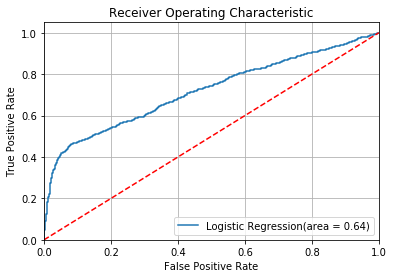

In [106]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_b_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_b_test, y_proba_cl1)
plt.figure()
plt.plot(fpr,tpr,label = "Logistic Regression(area = %.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.grid()
plt.show();


# Linear Model: balanced

## undersampling the majority

In [110]:
# Find the number of cases in minority class
len_minority = len(y_train[y_train!=0])

# Grab a sample from the majority class
X_train_majority_sample = X_train_prepared[y_train == 0].sample(len_minority)
X_train_majority_sample.shape

# Grab ALL of the minority class samples
X_train_min = X_train_prepared[y_train!=0]

# Concatenate the majority sample and the minority data
balanced = pd.concat([X_train_majority_sample, X_train_min], axis=0)

# grab y labels for these observations
y_balanced = y_train[balanced.index]
y_balanced

672         0.000000
3983        0.000000
11948       0.000000
8629        0.000000
15391       0.000000
            ...     
6951      137.226667
13805    4404.833333
10585     328.146667
11365    1803.000000
11638     363.066667
Name: Campaign Period Sales, Length: 6954, dtype: float64

## Feature_selection: Eigenvalues and RFE

In [129]:

X_train_balanced = balanced[[
    'Historical Sales Volume','Number of Prior Year Transactions',
      'Number of Employees','months_since_first_purchase',
    'Last Transaction Channel_PHONE',
    'Last Transaction Channel_WEB',   
    'Repurchase Method_NOTICE',  
    'Language_Spanish',
    'Computer','Office Supplies','Toner', 'Executive Chair','Monitor']]
X_test_RFE = X_test_prepared[[
    'Historical Sales Volume','Number of Prior Year Transactions',
      'Number of Employees','months_since_first_purchase',
    'Last Transaction Channel_PHONE',
    'Last Transaction Channel_WEB',   
    'Repurchase Method_NOTICE',  
    'Language_Spanish',
    'Computer','Office Supplies','Toner', 'Executive Chair','Monitor' ]]




NameError: name 'balanced' is not defined

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
li_r_bal = LinearRegression()
li_r_bal = li_r_bal.fit(X_train_balanced, y_balanced)

NameError: name 'X_train_balanced' is not defined

In [113]:
# feature selection
# rfe = RFE(li_r)
# rfe = rfe.fit(X_train_balanced,y_balanced)
# print(rfe.support_)
# print(rfe.ranking_)

In [114]:
y_l_bal = li_r_bal.predict(X_test_RFE)
(y_l_bal<0).sum()

407

In [115]:
from sklearn.metrics import r2_score

# R_squared
score = r2_score(y_test, y_l_bal)
score

0.19219968021297118

In [116]:
# X_train_RFE = X_train_prepared[['Historical Sales Volume', 'Number of Prior Year Transactions',
#        'Number of Employees', 
        
#        'Last Transaction Channel_Other', 'Last Transaction Channel_PHONE',
#         'Repurchase Method_AUTO RENEW','Language_Chinese',
      
#        'Language_Hebrew',  
#        'Language_Japanese', 
#        'Language_Portuguese',  'Desk',
#        'Computer'
#        ]]
# X_test_RFE = X_test_prepared[['Historical Sales Volume', 'Number of Prior Year Transactions',
#        'Number of Employees', 
        
#        'Last Transaction Channel_Other', 'Last Transaction Channel_PHONE',
#          'Repurchase Method_AUTO RENEW','Language_Chinese',
       
                              
#        'Language_Hebrew',  ------------------->Eigenvalues
#        'Language_Japanese', 
#        'Language_Portuguese',  'Desk',
#        'Computer'   
#        ]]-------------> score=0.165 but only 8 negatives


## Linear Model: unbalanced(normal) 

In [117]:
#  
X_train_RFE = X_train_prepared[[
    'Historical Sales Volume','Number of Prior Year Transactions',
    'Number of Employees','months_since_first_purchase',
    'Last Transaction Channel_PHONE',
    'Last Transaction Channel_WEB',     
    'Repurchase Method_NOTICE',  
    'Language_Spanish',
    'Computer','Office Supplies','Toner', 'Executive Chair','Monitor']]
X_test_RFE = X_test_prepared[[
    'Historical Sales Volume','Number of Prior Year Transactions',
    'Number of Employees','months_since_first_purchase',
    'Last Transaction Channel_PHONE',
    'Last Transaction Channel_WEB',     
    'Repurchase Method_NOTICE',  
    'Language_Spanish',
    'Computer','Office Supplies','Toner', 'Executive Chair','Monitor' ]]

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
li_r = LinearRegression()
li_r = li_r.fit(X_train_RFE, y_train)

In [229]:
y_l_pred = li_r.predict(X_test_RFE)
(y_l_pred<0).sum()

573

In [230]:
from sklearn.metrics import r2_score
#all feat = 0.26775
# all but 'Desk' and 'English'(almost no effect) = 0.267846
# all but 'Desk' and 'English'(almost no effect) Greek Lan = 0.26786
# all but 'Desk' and 'English'(almost no effect) 'Greek', 'Insurance' = 0.26787
# 'Chinese' almost no change: as immediate above, then 'German','Arabic' too(no)
# then 
# R_squared
score = r2_score(y_test, y_l_pred)
score

0.26954778489525666

## p-value

In [131]:
#!pip install regressors
from regressors import stats
stats.coef_pval(li_r,X_train_RFE,y_train)

NameError: name 'li_r' is not defined

In [232]:
li_r.intercept_

718.3792932290696

In [233]:
# coeffient df
coef_df = pd.DataFrame(li_r.coef_,index = X_train_RFE.columns, columns =["coefficients"])
coef_df

,coefficients
Historical Sales Volume,-38.668940
Number of Prior Year Transactions,175.434636
Number of Employees,58.578469
months_since_first_purchase,82.320999
Last Transaction Channel_PHONE,52.698740
Last Transaction Channel_WEB,71.792167
Repurchase Method_NOTICE,-170.231373
Language_Spanish,-127.014330
Computer,1037.575002
Office Supplies,-565.253833


In [124]:
print("\n=========== SUMMARY ===========")
xlabels = X_train_RFE.columns
stats.summary(li_r, X_train_RFE,y_train, xlabels)


=========== SUMMARY ===========
Residuals:
       Min       1Q   Median        3Q        Max
-6563.2538 -97.1935  99.3879  272.4018  3566.9765


Coefficients:
                                      Estimate  Std. Error  t value   p value
_intercept                          718.379293   12.789130  56.1711  0.000000
Historical Sales Volume             -38.668940    5.820253  -6.6439  0.000000
Number of Prior Year Transactions   175.434636    5.751623  30.5018  0.000000
Number of Employees                  58.578469    5.646715  10.3739  0.000000
months_since_first_purchase          82.320999    5.323900  15.4625  0.000000
Last Transaction Channel_PHONE       52.698740   21.319160   2.4719  0.013453
Last Transaction Channel_WEB         71.792167   14.301032   5.0201  0.000001
Repurchase Method_NOTICE           -170.231373   11.119294 -15.3095  0.000000
Language_Spanish                   -127.014330   72.560361  -1.7505  0.080062
Computer                           1037.575002   60.741005  

### Predicted Vs Actual

In [125]:
df_combine = pd.DataFrame({'Actual':y_test,"Predicted":y_l_pred})
df_combine['difference'] = df_combine['Actual']-df_combine['Predicted']
df_combine

,Actual,Predicted,difference
1071,0.000000,69.710653,-69.710653
7822,232.118095,450.484901,-218.366806
13616,0.000000,229.964457,-229.964457
291,0.000000,-15.270700,15.270700
9294,0.000000,230.863974,-230.863974
...,...,...,...
6217,268.493333,381.767313,-113.273980
10298,436.332000,516.974586,-80.642586
15077,0.000000,431.559806,-431.559806
839,0.000000,341.594398,-341.594398


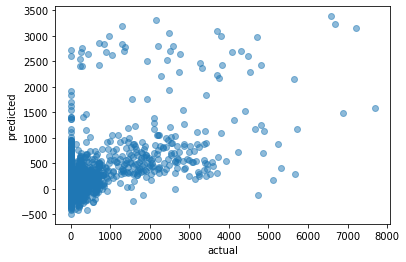

In [127]:

# scatter plot of actual versus predicted
plt.scatter(df_combine['Actual'],df_combine['Predicted'],alpha = 0.5)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

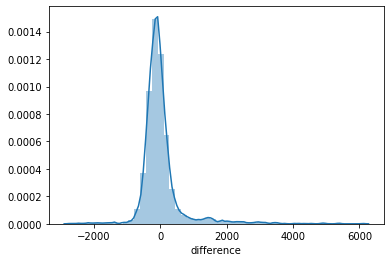

In [128]:
sns.distplot(df_combine['difference']);

In [129]:
# sns.distplot(y_train);

## Consider Transformation

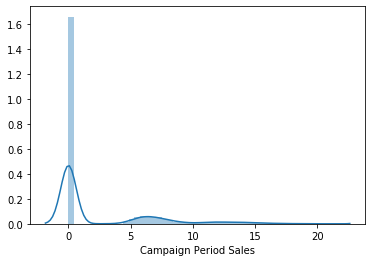

In [199]:
y_train_cbrt = np.cbrt(y_train)
y_test_cbrt = np.cbrt(y_test)
sns.distplot(y_train_cbrt);

## distribution of target variable

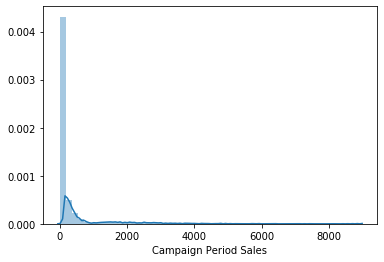

In [131]:
import seaborn as sns
sns.distplot(y_train);
# skewed to the right

## Polynomial

In [200]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(X_train_gbr)
X_poly_test = poly_reg.transform(X_test_gbr)

In [201]:
linear_reg = linear_reg.fit(X_poly_train,y_train_cbrt)

In [202]:
y_poly_pred = linear_reg.predict(X_poly_test)

In [203]:
linear_reg.score(X_poly_test,y_test_cbrt)

0.28160924048657254

## check for skewness:
We can objectively determine if the variable is skewed using the Shapiro-Wilks test. The null hypothesis for this test is that the data is a sample from a normal distribution, so a p-value less than 0.05 indicates significant skewness.

In [134]:
# # import shapiro
# from scipy.stats import shapiro

# # check for skewness by p-value
# shapiro(y_train)[1]
# ## p-value < 0.05 ---> the distribution is skewed(significant skewness)

# # pandas.skew
# feature_skewness = X_train_preparedOL.skew().sort_values(ascending = False)
# skewness = pd.DataFrame(feature_skewness,columns = ['skewness'])
# skewness# positive number is pos skewness and neg. number neg skewness and 
#         # larger positive is more positive skewed

## Transform a skewed distribution
* To reduce right skewness, take roots or logarithms or reciprocals (roots
    are weakest). This is the commonest problem in practice.


* To reduce left skewness, take squares or cubes or higher powers.

In [135]:
# Cubic root transformation
# y_train_cbrt = np.cbrt(y_train)
# y_test_cbrt = np.cbrt(y_test)
# sns.distplot(y_train_cbrt);

In [136]:
# # log base 10
# np.log10(10) # 1

# # cube root
# np.cbrt(27) # 3

In [137]:
# # log transformation
# y_train_log = np.log10(y_train+1)
# sns.distplot(y_train_log);

In [138]:
# # reciprocal transform
# y_train_rec = 1/(y_train+1)
# sns.distplot(y_train_rec);

## Linear performance evaluation: MAE,MSE,RMSE

MAE: The easiest to understand. Represents average error

MSE: Similar to MAE but noise is exaggerated and larger errors are “punished”. It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular.

RMSE: Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model.


In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test,y_l_pred)
mse = mean_squared_error(y_test,y_l_pred)
rmse = np.sqrt(mse)
print(f' mean absolute error:{mae}\n mean squared error:{mse}\n root mean squared error:{rmse}' )

 mean absolute error:343.1197539334759
 mean squared error:388846.96258583636
 root mean squared error:623.5759477287721


In [140]:
# checking collinearity
VIF = 1/(1-score) # if >5, extreme multicollinearity
                  # 1< VIF <5 , moderate multicollinearity- recommended
                  # VIF ~ 1, negligible
VIF       

1.3690149462502554

## Transforming target variables

In [141]:
# lo transformation
# y_train_log = np.log(y_train+1)
# y_test_log = np.log(y_test+1)
# sns.distplot(y_train_log);

In [142]:
# # sqrt transform
# y_train_sqrt = np.sqrt(y_train+10000)
# y_test_sqrt = np.sqrt(y_test+10000)
# sns.distplot(y_train_sqrt);

In [143]:
# dfff = pd.concat([y_train,X_train_gbr],axis=1)
# dfff.corr()['Campaign Period Sales'].sort_values()

In [144]:
#dfff.corr()

In [145]:
#sns.pairplot(dfff);

## Feature selection by importance and RFE

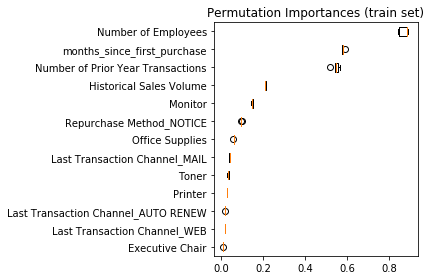

In [144]:

from sklearn.inspection import permutation_importance
#r2_score = r2_score(y_train,rf.predict(X_train_rf))
feat_imp = permutation_importance(rf, X_train_rf, y_train,random_state = 42,n_jobs = 2)
#feat_imp['importances']

sorted_idx = feat_imp.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(feat_imp.importances[sorted_idx].T,
           vert=False, labels=X_train_rf.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

In [245]:
from sklearn.metrics import f1_score

In [246]:
# training classification preds
y_train_pred = log_reg.predict_proba(X_train_gbr)[:,1]

# possible thresholds
thresholds_train = np.linspace(min(y_train_pred), 
                               max(y_train_pred) - 0.1, 100)

# list to hold scores on train and test
train_f1_scores = []

for t in thresholds_train:
    train_f1_scores.append(f1_score(
        y_b_train, y_train_pred > t, pos_label=1))

#find optimal precision score
optimal_t = float(thresholds_train[train_f1_scores==max(train_f1_scores)])
print("Threshold maximising f1 score - {}".format(optimal_t))

Threshold maximising f1 score - 0.3728171953011302


In [247]:
# testing classification preds
y_test_pred = log_reg.predict_proba(X_test_gbr)[:,1]

# possible thresholds
thresholds_test = np.linspace(min(y_test_pred), 
                               max(y_test_pred) - 0.1, 100)

# list to hold scores on train and test
test_f1_scores = []

for t in thresholds_test:
    test_f1_scores.append(f1_score(
        y_b_test, y_test_pred > t, pos_label=1))

#find optimal precision score
optimal_t = float(thresholds_test[test_f1_scores==max(test_f1_scores)])
print("Threshold maximising f1 score - {}".format(optimal_t))

Threshold maximising f1 score - 0.38339125183235107


## Best estimator

In [139]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [203]:
param_grid = {
    'learning_rate': [0.90,0.095, 0.105,0.1],
    'n_estimators': [120, 125, 130, 135, 165],
    'max_depth':  [3,4,5,6],
    'random_state': [0,10,20,30,42 ]
}
rscv = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(),
    param_distributions=param_grid,

)

In [142]:
pd.Series(y_gbr_pred, index=y_test.index).index

Int64Index([ 1071,  7822, 13616,   291,  9294,   450,  4203,  4976, 15140,
             4985,
            ...
              510, 13306, 15212,  8282,  9606,  6217, 10298, 15077,   839,
            11678],
           dtype='int64', length=3234)

In [204]:
rscv.fit(X_train_gbr, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                          

In [205]:
rscv.best_estimator_.predict(X_test_gbr)

array([ 94.76788748, 238.94953918,  -5.16461869, ..., 152.58237665,
        15.98468786, 230.42265734])

In [206]:
rscv.best_params_

{'random_state': 20, 'n_estimators': 125, 'max_depth': 4, 'learning_rate': 0.1}

In [ ]:
#GradientBoostingRegressor()

In [207]:
gbr2 = GradientBoostingRegressor(**rscv.best_params_)
gbr2.fit(X_train_gbr, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=125,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=20, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)